In [55]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import numpy as np
from parse_reports import *
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Postsynth Power and Area

In [56]:
module_name_dict = {
    "Activation Memory" : "activation",
    "Feature Loader"    : "feature",
    "Output Aligner"    : "mm",
    "Output Scaler"  : "output",
    "Padding Module" : "padder",
    "Write Queue"   : "piso",
    "Controller"    : "qracc",
    "SeqAcc (Digital)" : "seq",
    "WSAcc": "wsacc",
}

module_name_dict_full = {
    'u_activation_buffer': 'Activation Memory',
    'u_csr': 'Controller',
    'u_feature_loader': 'Feature Loader',
    'u_mm_output_aligner': 'Output Aligner',
    'u_output_scaler_set': 'Output Scaler',
    'u_padder': 'Padding Module',
    'u_piso_write_queue': 'Write Queue',
    'u_qracc_controller': 'Controller',
    'u_seq_acc': 'SeqAcc (Digital)',
    'u_wsacc': 'WSAcc',
}

In [57]:
dfa = parse_area_report("/home/lquizon/lawrence-workspace/SRAM_test/qrAcc2/qr_acc_2_digital/results/base_with_sram_1/reports/area_qr_acc_top.txt")
dfa_level1 = dfa[dfa['hierarchy_level'] == 1]
dfa_level1

hierarchy      hierarchy_clean          module_name  \
0    u_activation_buffer  u_activation_buffer  u_activation_buffer   
66                 u_csr                u_csr                u_csr   
67      u_feature_loader     u_feature_loader     u_feature_loader   
68   u_mm_output_aligner  u_mm_output_aligner  u_mm_output_aligner   
69   u_output_scaler_set  u_output_scaler_set  u_output_scaler_set   
326             u_padder             u_padder             u_padder   
327   u_piso_write_queue   u_piso_write_queue   u_piso_write_queue   
328   u_qracc_controller   u_qracc_controller   u_qracc_controller   
329            u_seq_acc            u_seq_acc            u_seq_acc   
332              u_wsacc              u_wsacc              u_wsacc   

           instance_name   total_area  percentage  combi_area  noncombi_area  \
0    u_activation_buffer  394292.8593        46.9    260.3736       375.6312   
66                 u_csr    1189.1160         0.1    443.7696       745.3464   
67      u_feature_loader   29229.6338         3.5  25862.1075      3367.5263   
68   u_mm_output_aligner    9110.5009         1.1   9110.5009         0.0000   
69   u_output_scaler_set  312170.1263        37.1   9020.3689     22496.9464   
326             u_padder     183.9528         0.0    183.9528         0.0000   
327   u_piso_write_queue   19663.2528         2.3  13232.2130      6431.0398   
328   u_qracc_controller    4019.2608         0.5   3544.2408       475.0200   
329            u_seq_acc   22844.9471         2.7  12623.2825      8138.3278   
332              u_wsacc   34076.9251         4.1    361.2240       767.3400   

     blackbox_area                                             design  \
0              0.0  activation_buffer_addrWidth32_dataSize8_interf...   
66             0.0                           qracc_csr_32_16_00000010   
67             0.0  feature_loader_inputWidth256_addrWidth32_eleme...   
68             0.0  mm_output_aligner_numColsPerBank32_elementBits...   
69             0.0  output_scaler_set_numElements256_inputWidth16_...   
326            0.0                 padder_elementWidth8_numElements32   
327            0.0  piso_write_queue_numParallelIn8_writeInterface...   
328            0.0  qracc_controller_numScalers256_numRows256_inte...   
329            0.0  seq_acc_maxInputBits8_inputElements256_outputE...   
332            0.0  wsacc_pe_cluster_numPes32_windowElements9_outp...   

     hierarchy_level  line_number  
0                  1           46  
66                 1          176  
67                 1          177  
68                 1          178  
69                 1          179  
326                1          692  
327                1          693  
328                1          694  
329                1          695  
332                1          698

/home/lquizon/lawrence-workspace/SRAM_test/qrAcc2/qr_acc_2_digital/results/parse_reports.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='hierarchy_clean', y='total_area', palette='plasma', ax=ax)


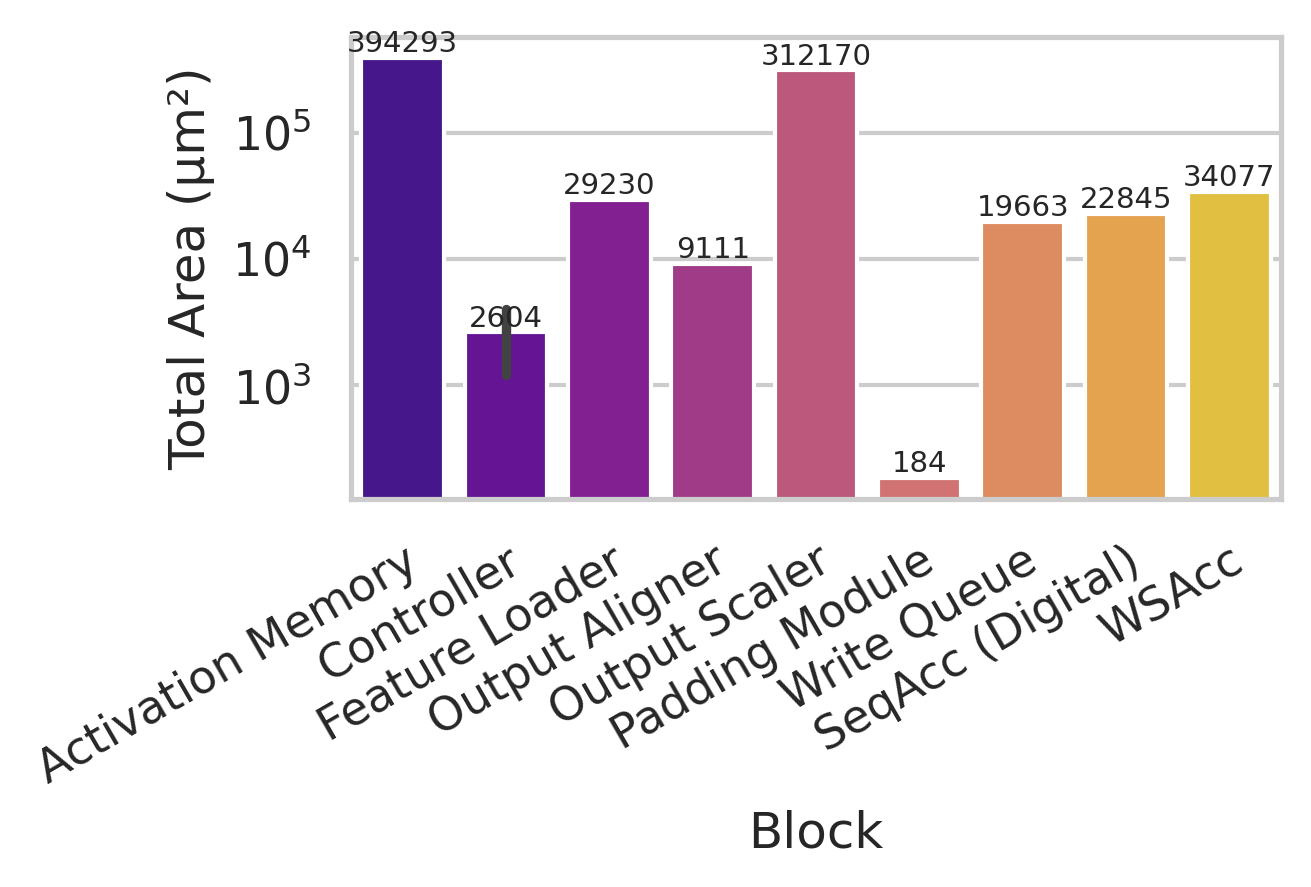

In [58]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=300)
plot_area_report(df_area_level1, ax=ax)
plt.savefig('area_bar.svg', bbox_inches='tight')

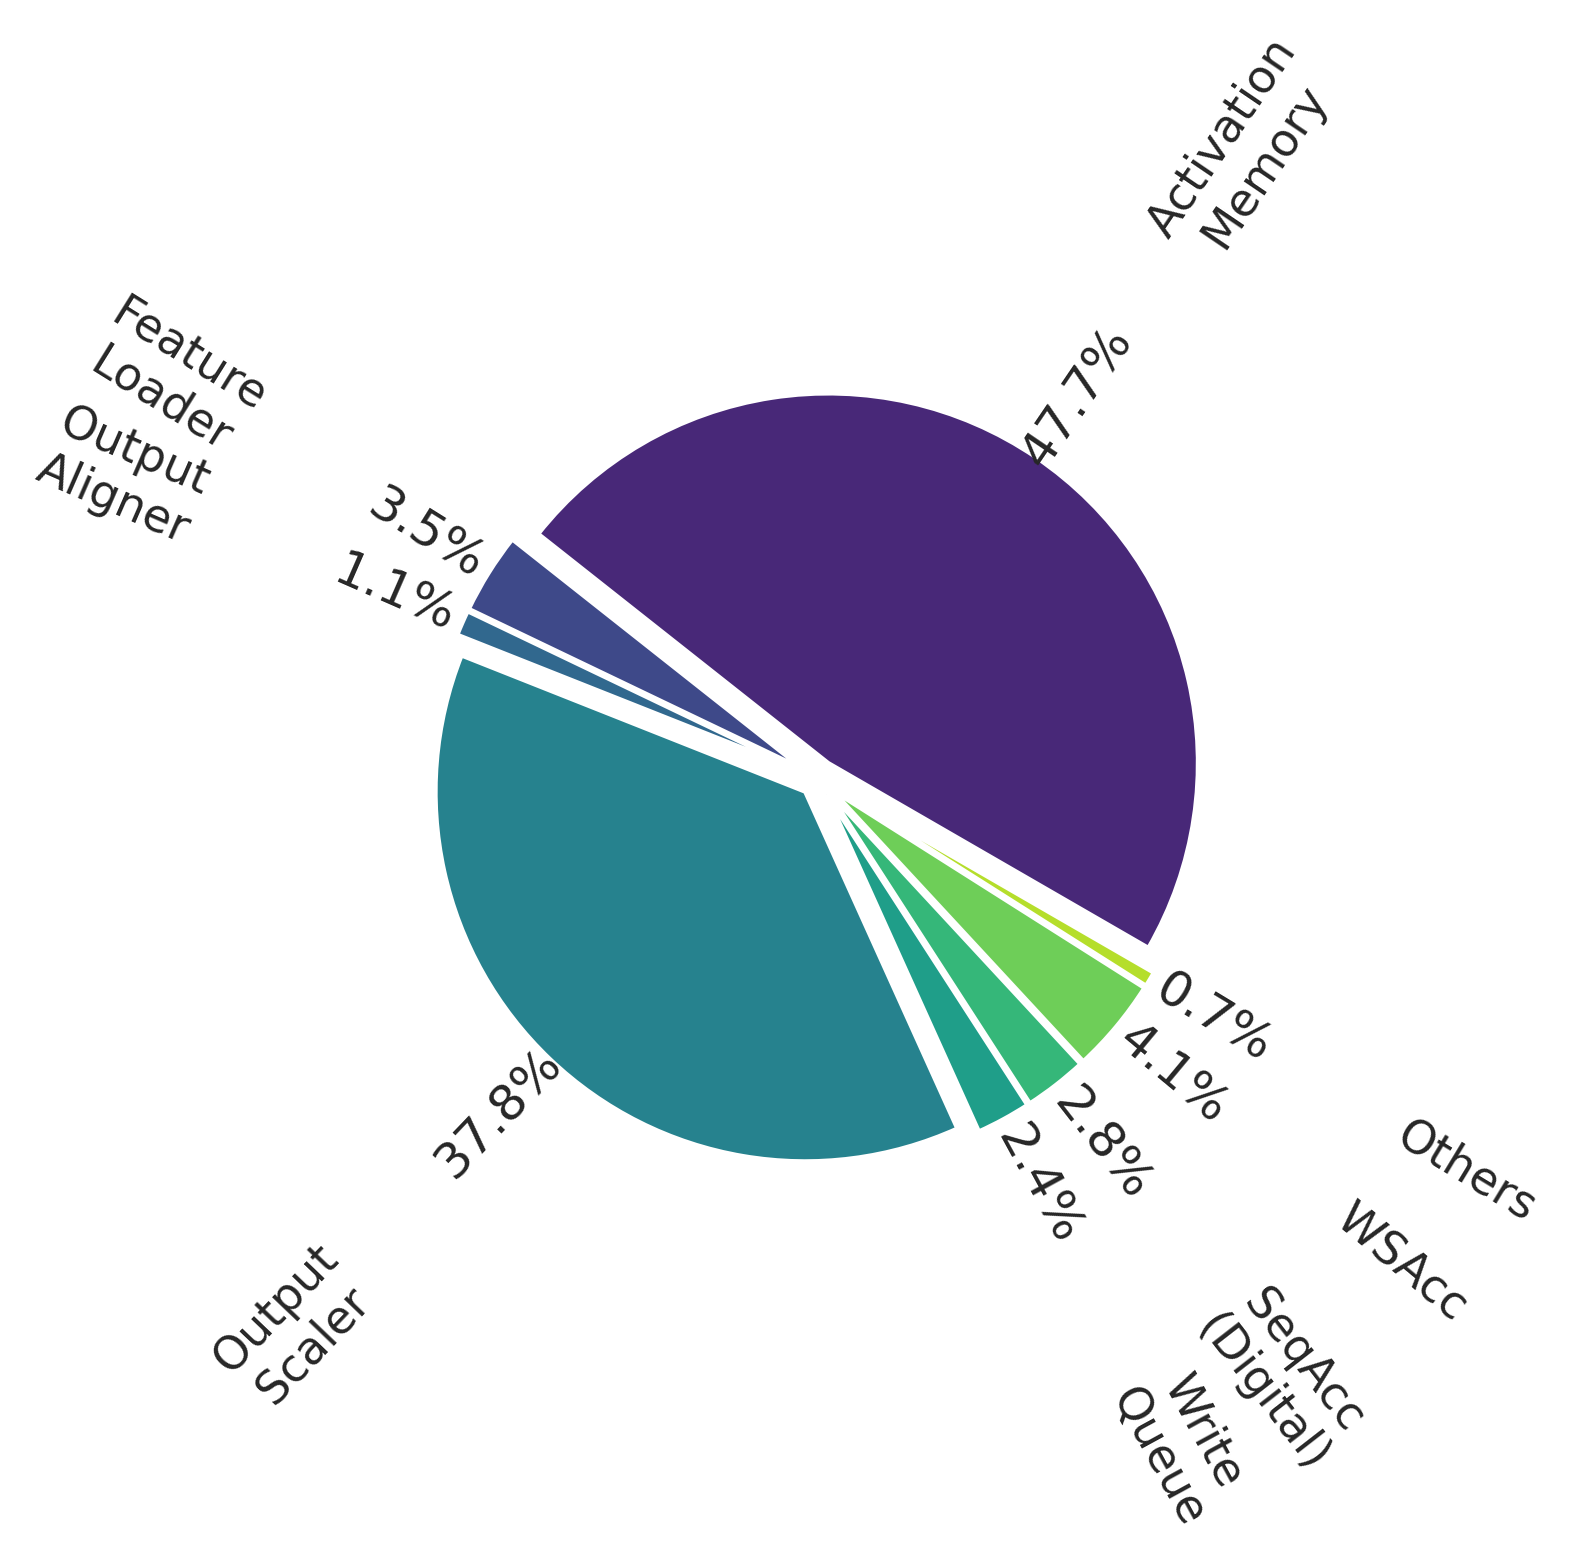

In [59]:
plot_area_pie(df_area_level1,-30)
plt.savefig('area_pie.svg', bbox_inches='tight')

# Per-state Power

In [60]:
power_path_dicts = {
    'Compute Analog': 'per_state_primetime/power/computeanalog_power_pt.rpt',
    'Compute Digital': 'per_state_primetime/power/computedigital_power_pt.rpt',
    'Idle': 'per_state_primetime/power/idle_power_pt.rpt',
    'Load Acts': 'per_state_primetime/power/loadacts_power_pt.rpt',
    'Load Bias': 'per_state_primetime/power/loadbias_power_pt.rpt',
    'Load Scalers': 'per_state_primetime/power/loadscaler_power_pt.rpt',
    'Load Weights': 'per_state_primetime/power/loadweights_power_pt.rpt',
    'Load Weights (WSAcc)': 'per_state_primetime/power/loadweightsdigital_power_pt.rpt',
    'Read Acts': 'per_state_primetime/power/readacts_power_pt.rpt',
}

# Parse the power reports for each state into a single DataFrame
df_power_states = pd.DataFrame()
for state, path in power_path_dicts.items():
    state_df = parse_report(path)
    state_df['state'] = state
    df_power_states = pd.concat([df_power_states, state_df], ignore_index=True)
df_power_states.to_csv('per_state_power.csv', index=False)

In [61]:
# Get the clean CSV for the manuscript
# CSV contains only module name, state, and the 4 power columns
# Also includes only hierarchy level 1

# Clean the names of the columns
column_dict = {
    'Module': 'module_name',
    'State': 'state',
    'Internal Power': 'int_power',
    'Switching Power': 'switch_power',
    'Leakage Power': 'leak_power',
    'Total Power': 'total_power'
}

module_name_dict = {
    "Activation Memory" : "activation",
    "Feature Loader"    : "feature",
    "Output Aligner"    : "mm",
    "Output Scaler"  : "output",
    "Padding Module" : "padder",
    "Write Queue"   : "piso",
    "Controller"    : "qracc",
    "SeqAcc (Digital)" : "seq",
    "WSAcc": "wsacc",
}

# Reverse the entries of the dictionary
module_name_dict = {v: k for k, v in module_name_dict.items()}

df_power_states_clean = df_power_states[df_power_states['hierarchy_level'] == 1]
df_power_states_clean = df_power_states_clean[['module_name', 'state', 'total_power']]
# Use engineering format
# df_power_states_clean['total_power'] = df_power_states_clean['total_power'].apply(lambda x: np.around(x, 2)) 
# Use module name as index, and state as columns
# If there are duplicate (module_name, state) pairs, aggregate them (e.g., sum or mean)
df_power_states_clean = df_power_states_clean.groupby(['module_name', 'state'], as_index=False).agg({'total_power': 'first'})
df_power_states_clean = df_power_states_clean.pivot(index='module_name', columns='state', values='total_power')
# Rename index to 'Module'
df_power_states_clean.index.name = 'Module'
# Add total power row
# Rename the index to the module names
df_power_states_clean.index = df_power_states_clean.index.map(module_name_dict)
df_power_states_clean.loc['Total Power'] = df_power_states_clean.sum(numeric_only=True)

# Add a column for the average power of each module
df_power_states_clean.to_csv('per_state_power_clean.csv')
df_power_states_clean['Average Power'] = df_power_states_clean.mean(axis=1)

df_power_states_clean.to_csv('per_state_power_clean_withavg.csv')
df_power_states_clean

state              Compute Analog  Compute Digital          Idle  \
Module                                                             
Activation Memory    4.560000e-06     4.440000e-06  4.100000e-06   
Feature Loader       7.610000e-07     6.500000e-07  3.150000e-07   
Output Aligner       1.990000e-07     5.630000e-08  8.320000e-08   
Output Scaler        1.310000e-05     2.730000e-06  2.410000e-06   
Padding Module       2.110000e-07     1.360000e-07  3.260000e-10   
Write Queue          7.760000e-07     6.340000e-07  5.600000e-07   
Controller           5.540000e-08     5.260000e-08  5.070000e-08   
SeqAcc (Digital)     1.830000e-06     1.020000e-06  1.000000e-06   
WSAcc                4.010000e-07     9.000000e-07  3.730000e-07   
Total Power          2.189340e-05     1.061890e-05  8.892226e-06   

state                 Load Acts     Load Bias  Load Scalers  Load Weights  \
Module                                                                      
Activation Memory  4.480000e-06  4.310000e-06  4.310000e-06  4.320000e-06   
Feature Loader     3.210000e-07  3.210000e-07  3.210000e-07  3.210000e-07   
Output Aligner     1.370000e-08  1.370000e-08  1.650000e-08  1.130000e-08   
Output Scaler      2.390000e-06  2.360000e-06  2.370000e-06  2.310000e-06   
Padding Module     5.010000e-10  3.460000e-10  3.460000e-10  3.460000e-10   
Write Queue        5.690000e-07  5.680000e-07  5.680000e-07  5.680000e-07   
Controller         4.650000e-08  4.570000e-08  4.570000e-08  4.620000e-08   
SeqAcc (Digital)   1.010000e-06  1.010000e-06  1.010000e-06  1.020000e-06   
WSAcc              3.910000e-07  3.890000e-07  3.890000e-07  3.890000e-07   
Total Power        9.221701e-06  9.017746e-06  9.030546e-06  8.985846e-06   

state              Load Weights (WSAcc)     Read Acts  Average Power  
Module                                                                
Activation Memory          4.290000e-06  4.400000e-06   4.356667e-06  
Feature Loader             3.200000e-07  4.170000e-07   4.163333e-07  
Output Aligner             1.130000e-08  1.370000e-08   4.652222e-08  
Output Scaler              2.340000e-06  2.350000e-06   3.595556e-06  
Padding Module             3.460000e-10  8.740000e-08   4.851233e-08  
Write Queue                5.640000e-07  5.660000e-07   5.970000e-07  
Controller                 4.550000e-08  4.590000e-08   4.824444e-08  
SeqAcc (Digital)           1.010000e-06  1.010000e-06   1.102222e-06  
WSAcc                      4.010000e-07  3.980000e-07   4.478889e-07  
Total Power                8.982146e-06  9.288000e-06   1.065895e-05

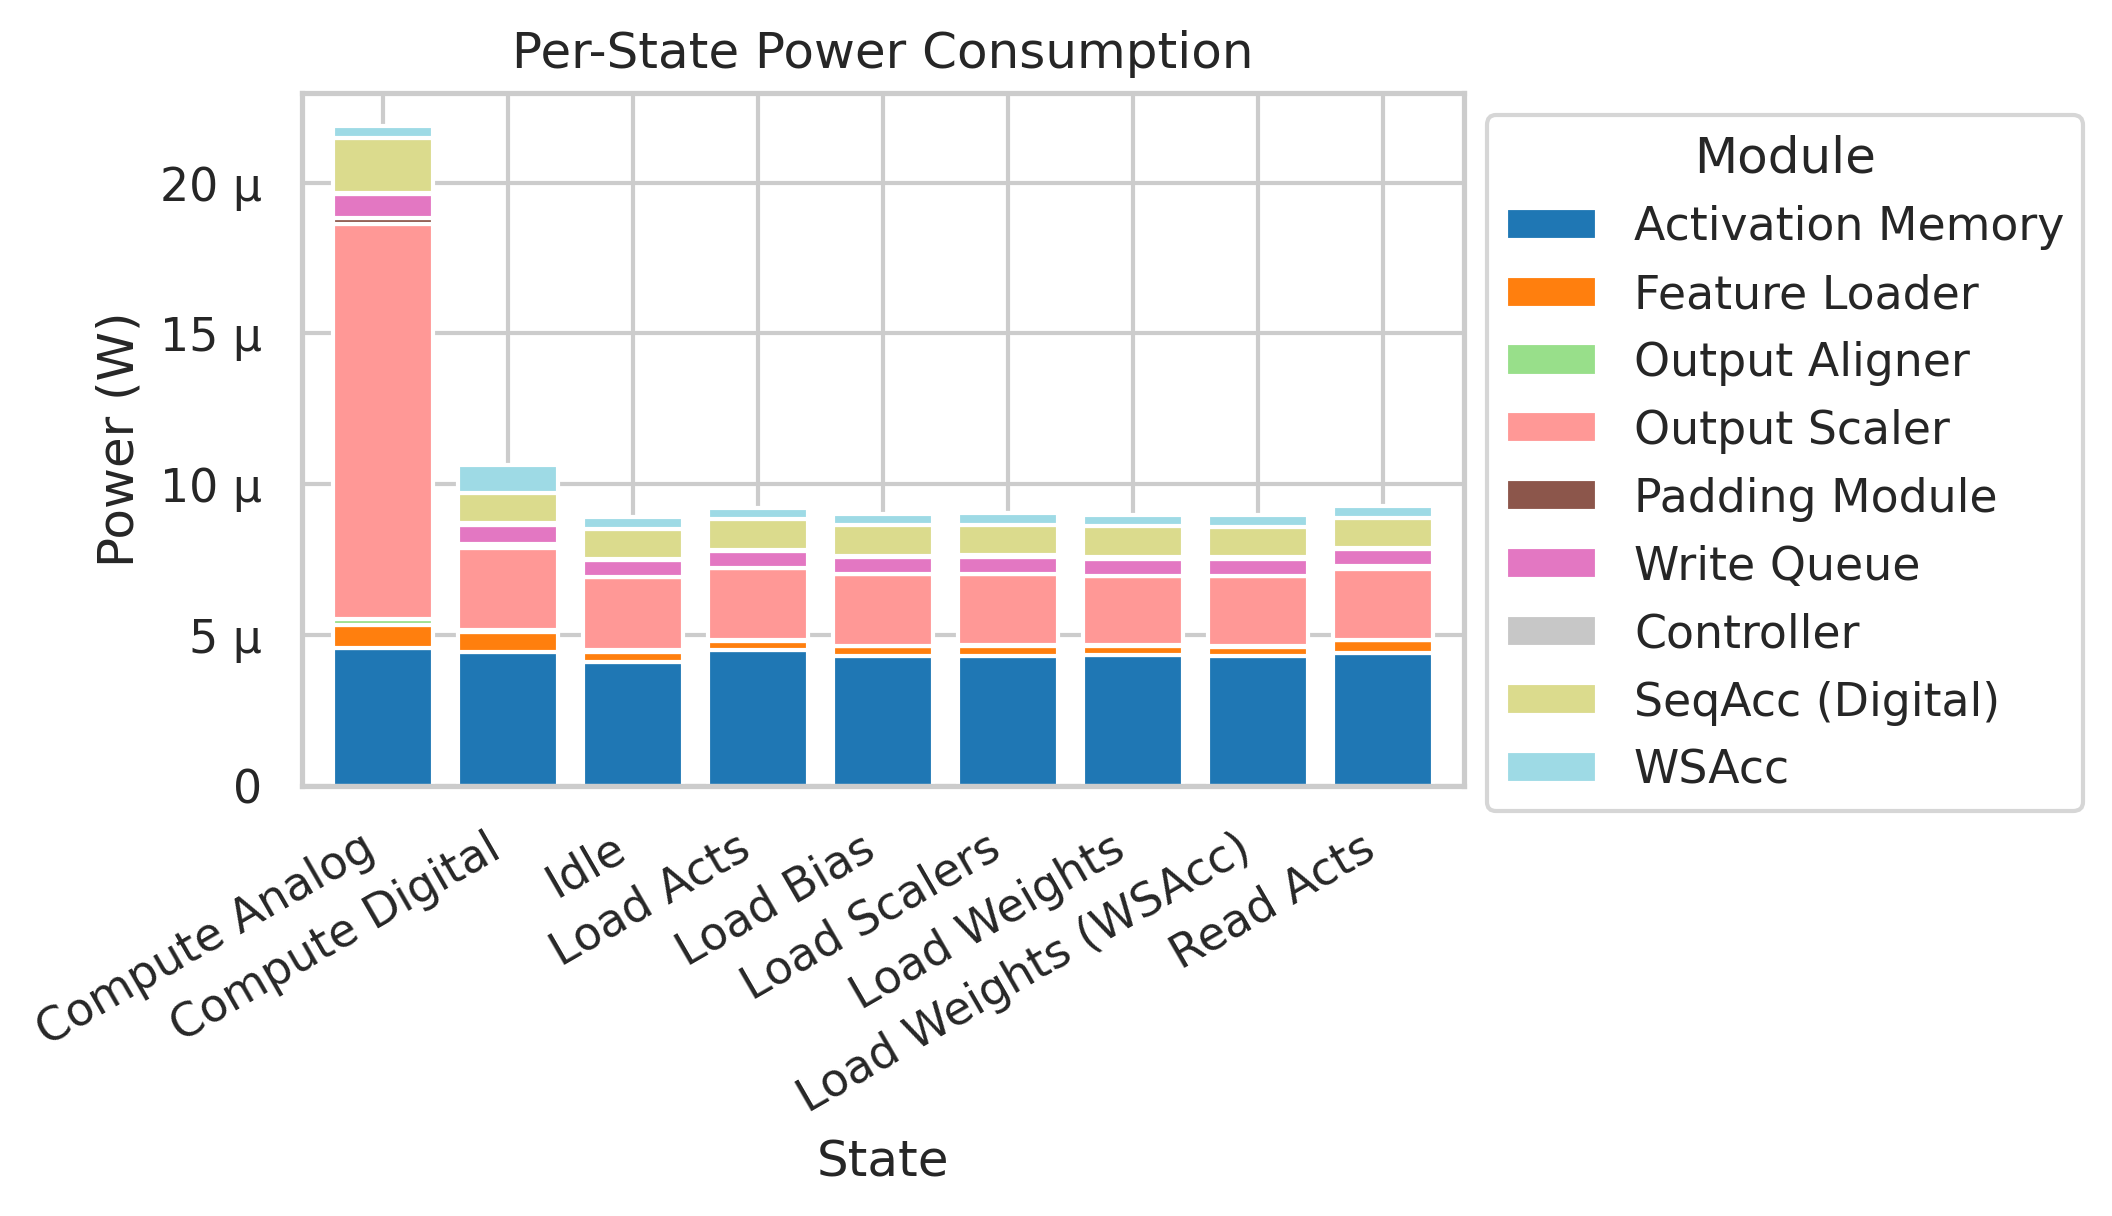

In [62]:
# Stacked bar plot of the per-state power
df_power_states_clean = pd.read_csv('per_state_power_clean.csv', index_col=0)
df_power_states_clean = df_power_states_clean.drop('Total Power')
df_power_states_clean = df_power_states_clean.T
fig = plt.figure(figsize=(5, 3), dpi=300)
ax = fig.add_subplot(111)
df_power_states_clean.plot(kind='bar', stacked=True,
                          title='Per-State Power Consumption',
                          ylabel='Power (W)',
                          xlabel='State',
                          colormap='tab20',
                          width=0.8,
                          ax=ax)
# set legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Module')
# Use engformatter for y-axis
from matplotlib.ticker import EngFormatter
eng_format = EngFormatter()
ax.yaxis.set_major_formatter(eng_format)
plt.xticks(rotation=30, ha='right')

plt.savefig('per_state_power_stacked_bar.svg', bbox_inches='tight')

/home/lquizon/lawrence-workspace/SRAM_test/qrAcc2/qr_acc_2_digital/results/parse_reports.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='hierarchy_clean', y='total_power', palette='viridis', ax=ax)


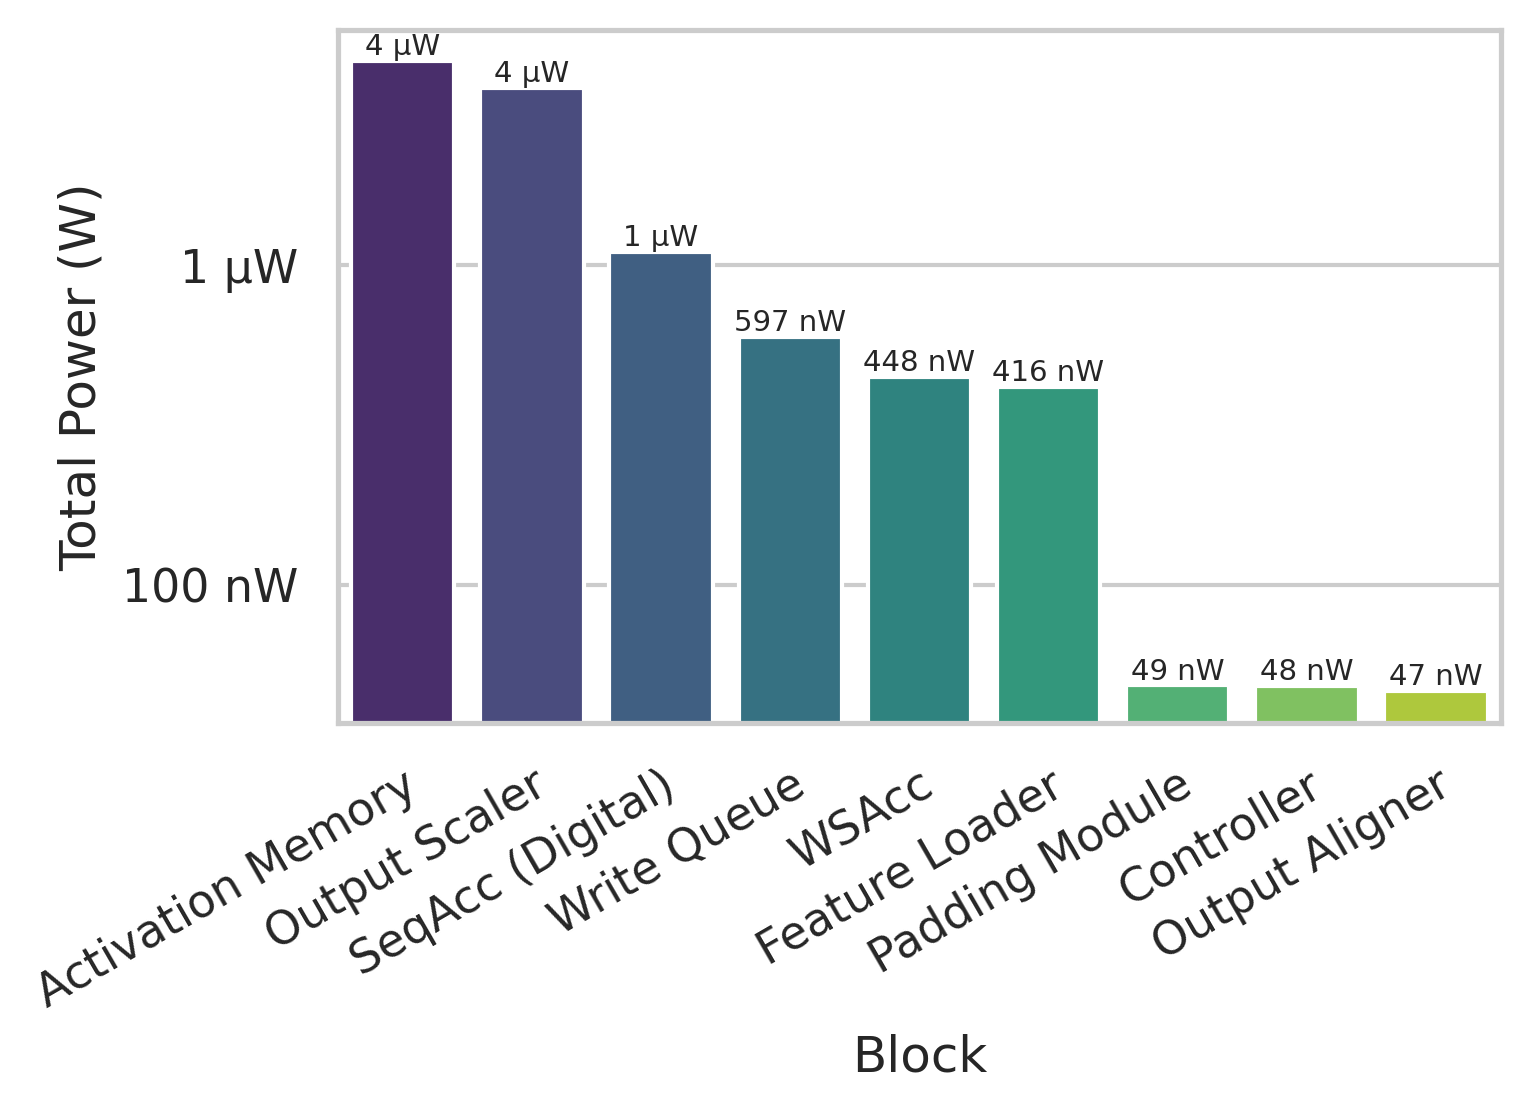

In [63]:
# Bar plot of the average power of each module
df_power_states_clean = pd.read_csv('per_state_power_clean_withavg.csv', index_col=0)
df_power_states_clean = df_power_states_clean.drop('Total Power')
df_power_states_clean = df_power_states_clean.sort_values(by='Average Power', ascending=False)
fig = plt.figure(figsize=(5, 3), dpi=300)
ax = fig.add_subplot(111)
# turn index into a column
df_power_states_clean = df_power_states_clean.reset_index()
df_power_states_clean['hierarchy_clean'] = df_power_states_clean['Module']
df_power_states_clean['total_power'] = df_power_states_clean['Average Power']
# Add a percentage column
df_power_states_clean['percentage'] = df_power_states_clean['Average Power'] / df_power_states_clean['Average Power'].sum() * 100

plot_power_report(df_power_states_clean, ax=ax)
plt.savefig('power_bar.svg', bbox_inches='tight')

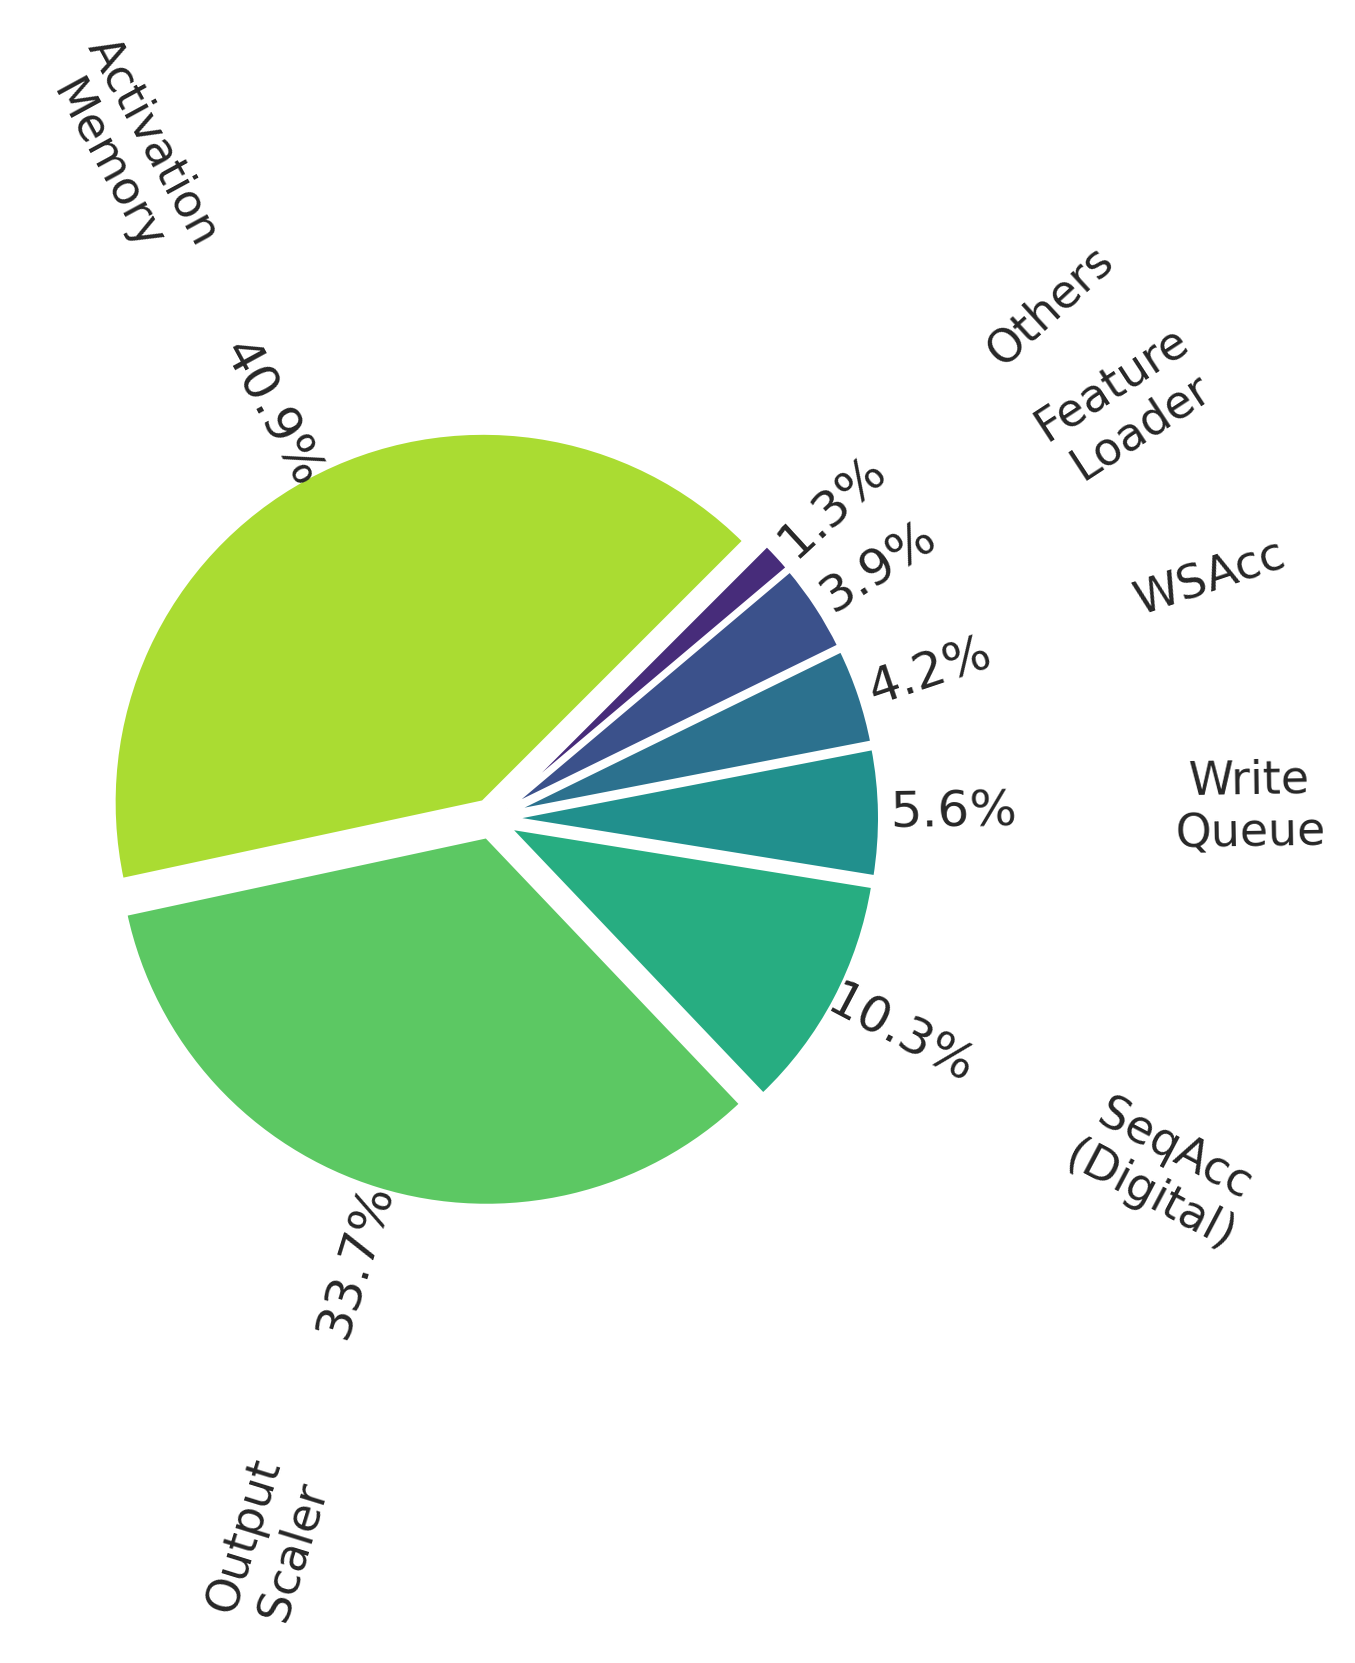

In [64]:
plot_power_pie(df_power_states_clean, 45)
plt.savefig('power_pie.svg', bbox_inches='tight')

# Crunching QRAcc Statistics

In [65]:
stat_csv_paths = [
    'qracc_statistics_MBV2_Naive.csv',
    'qracc_statistics_MBV2_Balanced.csv',
    'qracc_statistics_MBV2_Write Optimized.csv',
    'qracc_statistics_MBV2_Dense.csv',
    'qracc_statistics_FCAE_Naive.csv',
    'qracc_statistics_FCAE_Balanced.csv',
    'qracc_statistics_FCAE_Write Optimized.csv',
    'qracc_statistics_FCAE_Dense.csv',
    'qracc_statistics_ResNet_Naive.csv',
    'qracc_statistics_ResNet_Balanced.csv',
    'qracc_statistics_ResNet_Write Optimized.csv',
    'qracc_statistics_ResNet_Dense.csv',
    'qracc_statistics_DSCNN_Naive.csv',
    'qracc_statistics_DSCNN_Balanced.csv',
    'qracc_statistics_DSCNN_Write Optimized.csv',
    'qracc_statistics_DSCNN_Dense.csv',
]

dfs = []
for path in stat_csv_paths:
    packer = path.split('_')[-1].split('.')[0]
    model = path.split('_')[-2]
    df = pd.read_csv(path)
    df['PackerType'] = packer
    df['Model'] = model
    df['Time'] = df['Time'] * 1e-12 # Convert time from ps to seconds
    df['Duration'] = df['Time'].diff().fillna(df['Time'])   
    node_data_df = pd.read_csv(f'mapped_nodes_processed_{model}.csv')
    merged_df = pd.merge(df, node_data_df, right_on='node_name', left_on='EventName', how='left')
    merged_df = merged_df.drop(columns=['EventName'])
    dfs.append(merged_df)

df_stats = pd.concat(dfs, ignore_index=True)
df_stats['Node Number'] = df_stats['node_id']
df_stats['Depthwise'] = df_stats['depthwise']
df_stats.to_csv('qracc_statistics_combined.csv', index=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


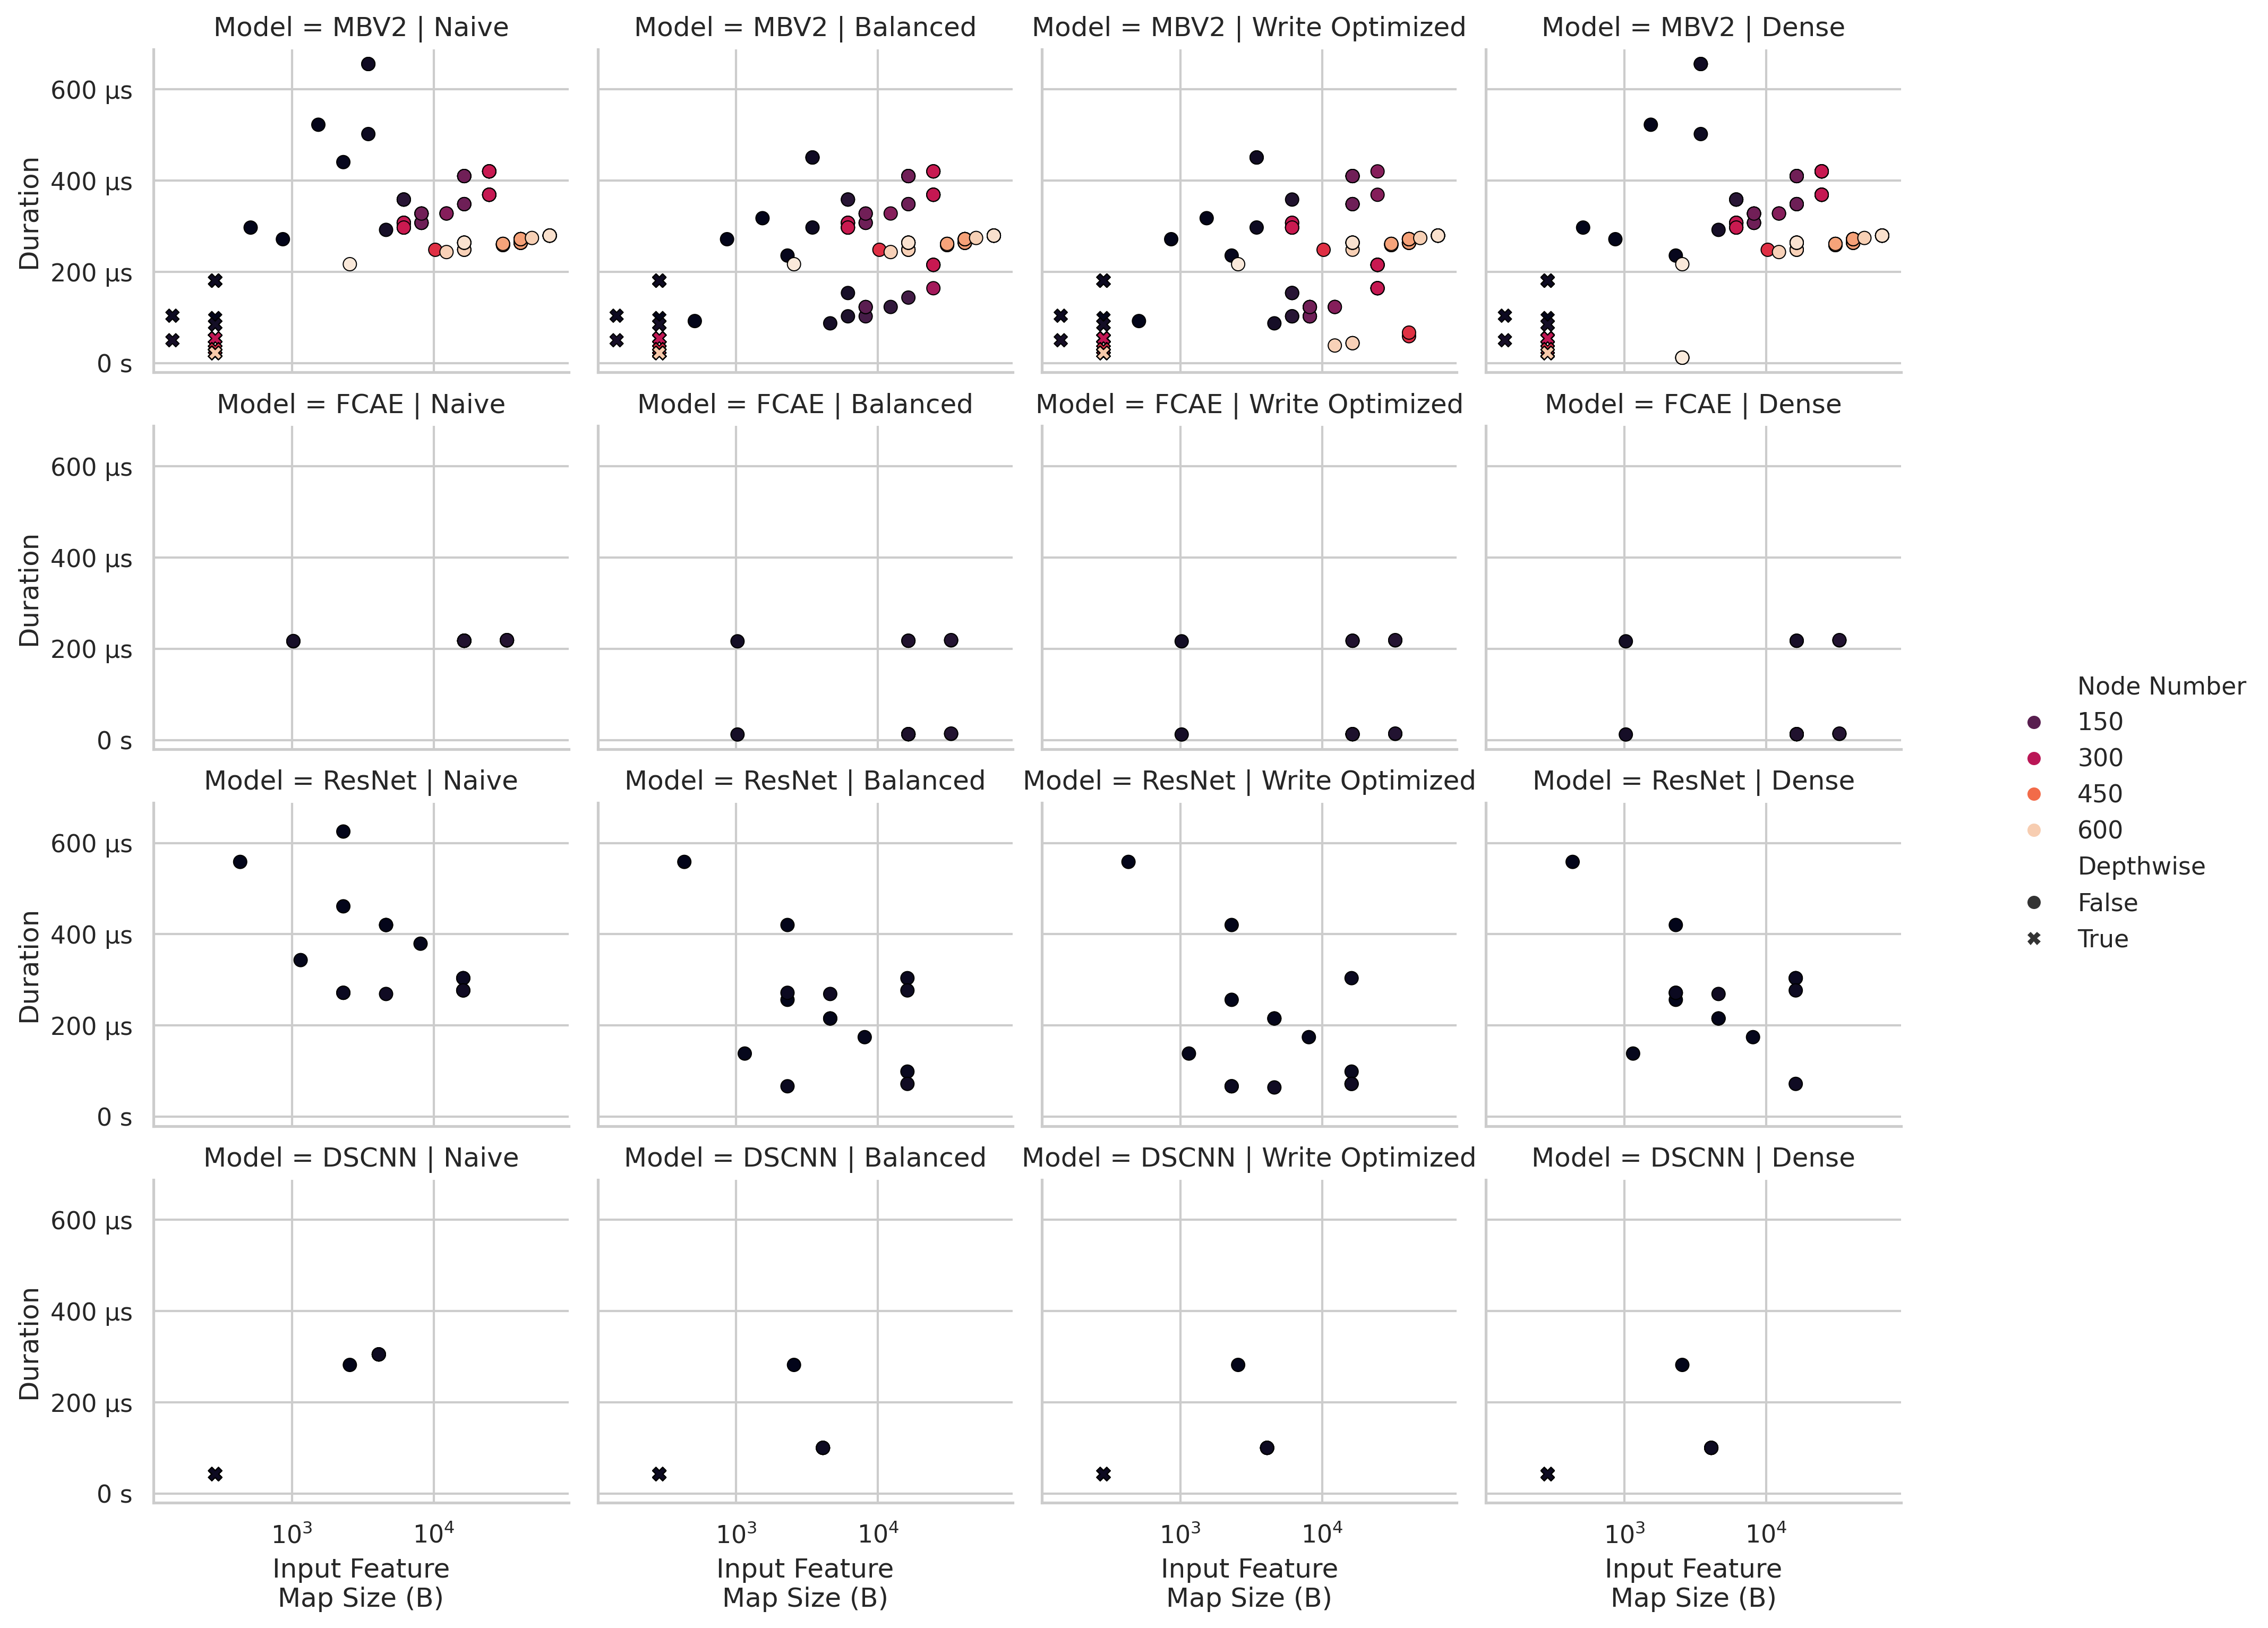

In [66]:
# Duration vs Ifmap size vs Layer type Scatter
mbv2_stat_df = pd.read_csv('qracc_statistics_combined.csv')
# mbv2_stat_df = mbv2_stat_df[mbv2_stat_df['Model'] == 'ResNet']

sns.set_theme(style="whitegrid")
# fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
# Use relplot to facet by PackerType
g = sns.relplot(
	data=mbv2_stat_df,
	x='kernel_size',
	y='Duration',
	hue='Node Number',
	style='Depthwise',
	kind='scatter',
	col='PackerType',
    row='Model',
	facet_kws={'sharey': True, 'sharex': True},
	edgecolor='black',
	height=3,
	aspect=1,
    palette='rocket'
)

# Set DPI to 300
g.fig.set_dpi(300)
g.fig.set_size_inches(14, 10)

# Add lines between points based on index for each facet
# for ax, (_, subdf) in zip(g.axes.flat, mbv2_stat_df.groupby('PackerType')):
# 	ax.plot(subdf['ifmap_size'], subdf['Duration'], color='gray', alpha=0.25, zorder=0)

# set engformatter
from matplotlib.ticker import EngFormatter
for ax in g.axes.flat:
    eng_format_y = EngFormatter(unit='s')
    eng_format_x = EngFormatter(unit='B')
    ax.yaxis.set_major_formatter(eng_format_y)
    ax.xaxis.set_major_formatter(eng_format_x)
    # Add linebreaks to x-axis label
    ax.set_xlabel('Input Feature\nMap Size (B)')
# set legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1.8, 1), borderaxespad=0., frameon=False)
plt.xscale('log')
# replace node_id with Node Number

# Remove "PackerType" from the facet titles
for ax in g.axes.flat:
    ax.set_title(ax.get_title().replace('PackerType = ', ''))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


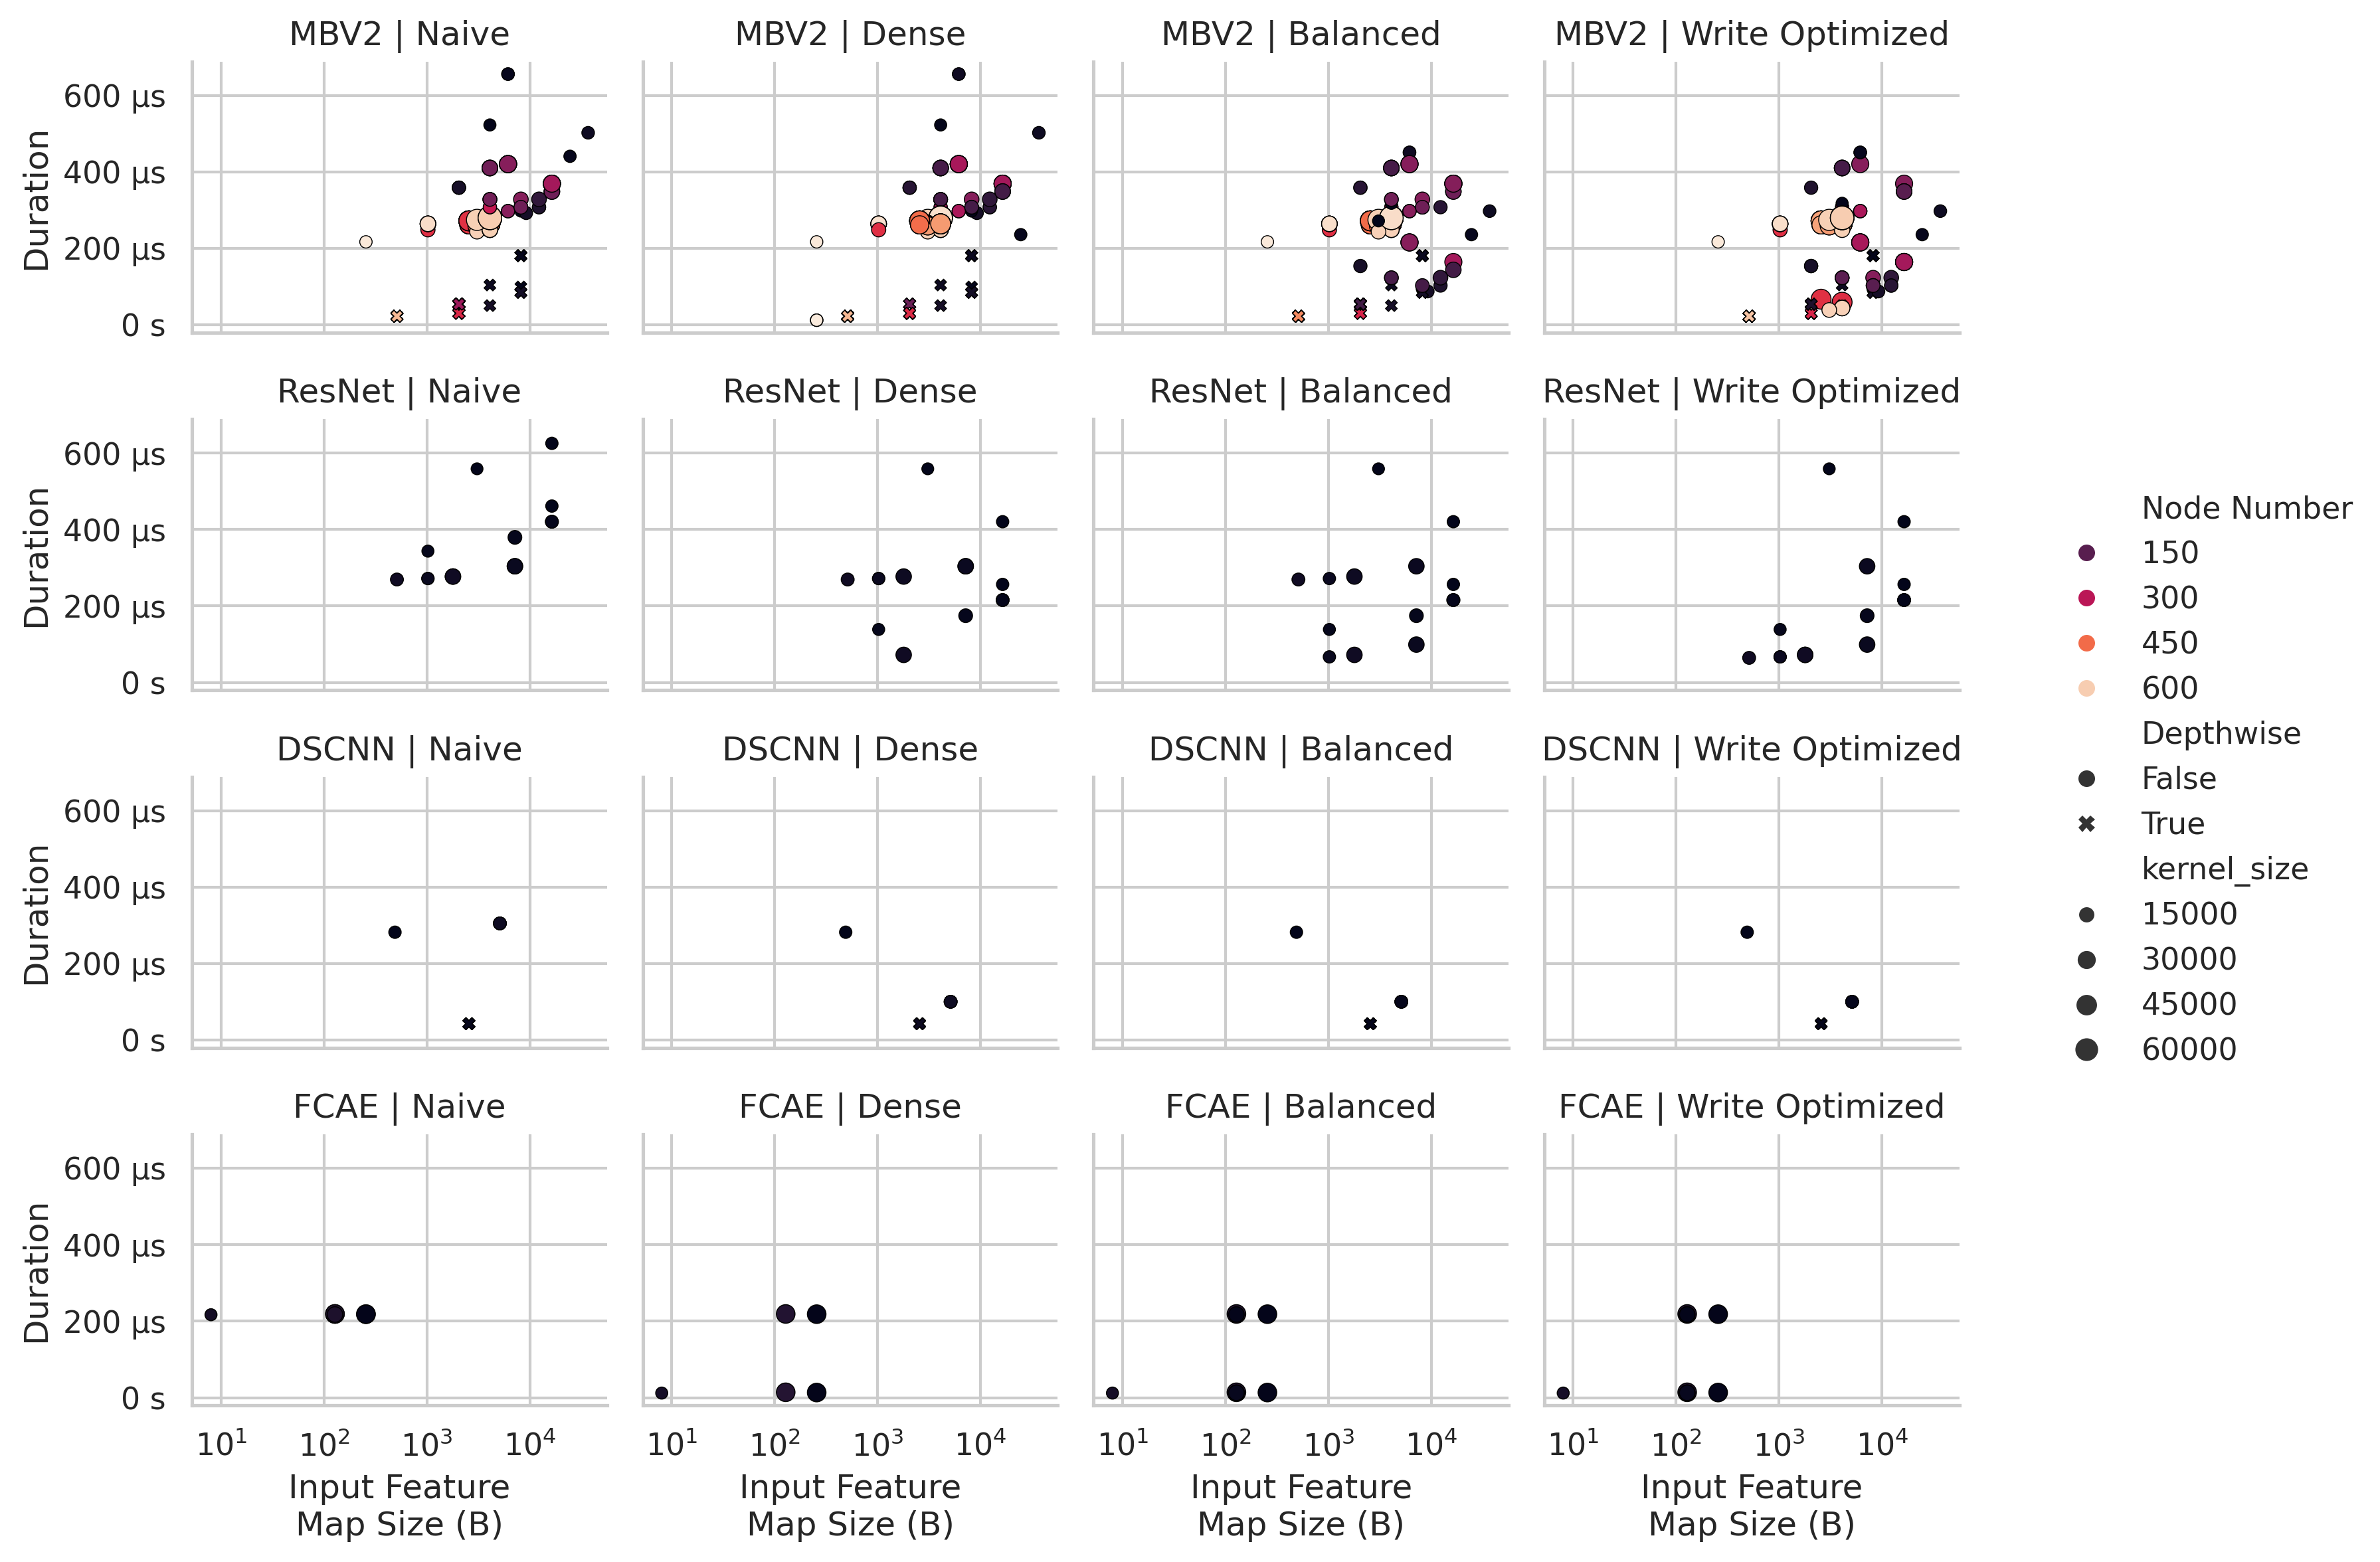

In [67]:
# Duration vs Ifmap size vs Layer type Scatter
mbv2_stat_df = pd.read_csv('qracc_statistics_combined.csv')
# mbv2_stat_df = mbv2_stat_df[mbv2_stat_df['Model'] == 'ResNet']

sns.set_theme(style="whitegrid")
# fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
# Use relplot to facet by PackerType
packer_order = ['Naive','Dense', 'Balanced', 'Write Optimized']
mbv2_stat_df['PackerType'] = pd.Categorical(mbv2_stat_df['PackerType'], categories=packer_order, ordered=True)
mbv2_stat_df = mbv2_stat_df.sort_values('PackerType')
g = sns.relplot(
	data=mbv2_stat_df,
	x='ifmap_size',
	y='Duration',
	hue='Node Number',
	style='Depthwise',
	kind='scatter',
	col='PackerType',
    row='Model',
	facet_kws={'sharey': True, 'sharex': True},
	edgecolor='black',
	height=3,
	aspect=1,
    palette='rocket',
    size='kernel_size'
)

# Set DPI to 300
g.fig.set_dpi(300)
g.fig.set_size_inches(12, 8)

# Add lines between points based on index for each facet
# for ax, (_, subdf) in zip(g.axes.flat, mbv2_stat_df.groupby('PackerType')):
# 	ax.plot(subdf['ifmap_size'], subdf['Duration'], color='gray', alpha=0.25, zorder=0)

# set engformatter
from matplotlib.ticker import EngFormatter
for ax in g.axes.flat:
    eng_format_y = EngFormatter(unit='s')
    eng_format_x = EngFormatter(unit='B')
    ax.yaxis.set_major_formatter(eng_format_y)
    ax.xaxis.set_major_formatter(eng_format_x)
    # Add linebreaks to x-axis label
    ax.set_xlabel('Input Feature\nMap Size (B)')
# set legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1.8, 1), borderaxespad=0., frameon=False)
plt.xscale('log')
plt.tight_layout()
# replace node_id with Node Number

# Remove "PackerType" from the facet titles
for ax in g.axes.flat:
    ax.set_title(ax.get_title().replace('PackerType = ', ''))
    ax.set_title(ax.get_title().replace('Model = ', ''))

In [68]:
mbv2_stat_df[mbv2_stat_df['Model'] == 'ResNet']

Time  ActmemExtReads  ActmemExtWrites  ActmemIntReads  \
1317  0.004088            1025             1792             592   
1318  0.004359            1025              256             208   
1319  0.004636            1025              448             592   
1321  0.005183            1025              128             208   
1316  0.003784            1025              256             208   
1315  0.003512            1025             1792             592   
1313  0.002865            2049             1792            2319   
1314  0.003208            2049              256             783   
1308  0.000559            4097              768            3087   
1309  0.001020               0                0            6159   
1310  0.001645            4097                0            6159   
1311  0.002065            2049             4096            1551   
1312  0.002485            2049             4096            1551   
1320  0.004913            1025              448             592   
1357  0.002283            1025             1792             592   
1358  0.002555            1025              256             208   
1359  0.002859            1025             1792             592   
1360  0.003131            1025              256             208   
1361  0.003408            1025              448             592   
1362  0.003480            1025              448             592   
1363  0.003749            1025              128             208   
1356  0.001980            2049              256             783   
1355  0.001841            2049             1792            2319   
1354  0.001666            2049             4096            1551   
1353  0.001451            2049             4096            1551   
1350  0.000559            4097              768            3087   
1351  0.000815               0                0            6159   
1352  0.001235            4097                0            6159   
1327  0.001841            2049             1792            2319   
1328  0.001980            2049              256             783   
1329  0.002079            1025             1792             592   
1330  0.002146            1025              256             208   
1331  0.002450            1025             1792             592   
1332  0.002721            1025              256             208   
1333  0.002998            1025              448             592   
1334  0.003071            1025              448             592   
1335  0.003340            1025              128             208   
1326  0.001666            2049             4096            1551   
1325  0.001451            2049             4096            1551   
1323  0.000815               0                0            6159   
1322  0.000559            4097              768            3087   
1324  0.001235            4097                0            6159   
1349  0.002725            1025              128             208   
1344  0.002146            1025              256             208   
1345  0.002450            1025             1792             592   
1346  0.002517            1025              256             208   
1347  0.002589            1025              448             592   
1348  0.002661            1025              448             592   
1336  0.000559            4097              768            3087   
1337  0.000815               0                0            6159   
1338  0.001235            4097                0            6159   
1339  0.001451            2049             4096            1551   
1340  0.001666            2049             4096            1551   
1341  0.001841            2049             1792            2319   
1342  0.001980            2049              256             783   
1343  0.002079            1025             1792             592   

      ActmemIntWrites  FLReads  FLWrites  SeqAccWeightWrites  \
1317              128        0       592                2048   
1318              128        0       208                2048  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


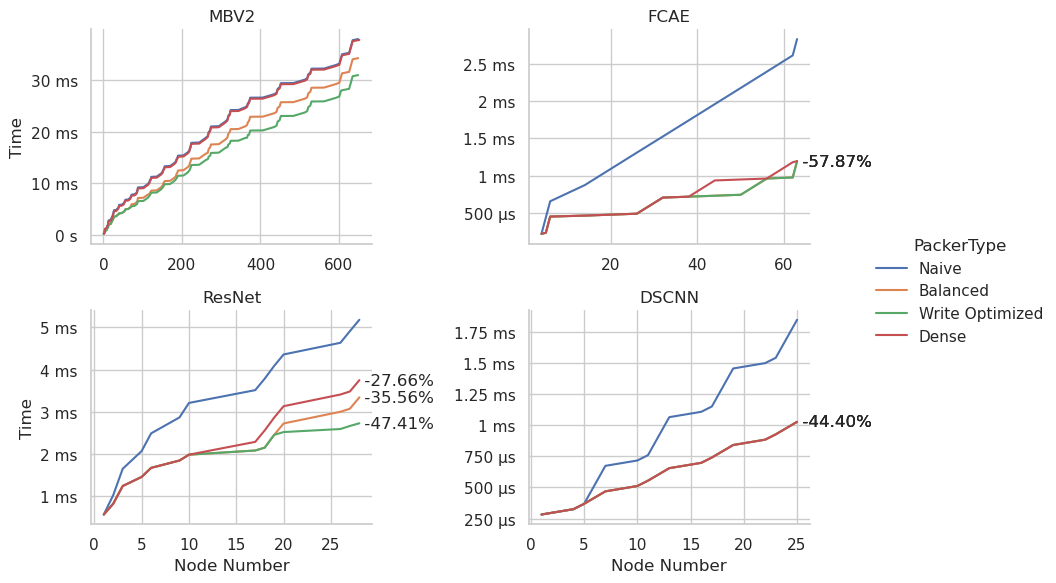

In [69]:
import math

mbv2_stat_df = pd.read_csv('qracc_statistics_combined.csv')

models = mbv2_stat_df['Model'].unique()
n_models = len(models)
n_cols = 2
n_rows = math.ceil(n_models / n_cols)

# Assign each model to a grid position
model_grid = pd.DataFrame({'Model': models})
model_grid['row'] = model_grid.index // n_cols
model_grid['col'] = model_grid.index % n_cols

# Map each row in mbv2_stat_df to its grid position
mbv2_stat_df = mbv2_stat_df.merge(model_grid, on='Model', how='left')

g = sns.relplot(
    data=mbv2_stat_df,
    x='Node Number',
    y='Time',
    hue='PackerType',
    kind='line',
    row='row',
    col='col',
    facet_kws={'sharey': False, 'sharex': False},
    height=3,
    aspect=1.2,
    dashes=False
)

from matplotlib.ticker import EngFormatter
eng_format_y = EngFormatter(unit='s')
for ax, (_, subdf) in zip(g.axes.flat, model_grid.iterrows()):
    ax.yaxis.set_major_formatter(eng_format_y)
    model_name = subdf['Model']
    ax.set_title(model_name)

    # Write the percentage differences at the end of each line (between PackerTypes, only for last node)
    df_model = mbv2_stat_df[mbv2_stat_df['Model'] == model_name]
    last_node = df_model['Node Number'].max()
    last_points = df_model[df_model['Node Number'] == last_node]
    if 'Naive' in last_points['PackerType'].values:
        base_time = last_points[last_points['PackerType'] == 'Naive']['Time'].values[0]
        for idx, row in last_points.iterrows():
            if row['PackerType'] == 'Naive':
                continue
            percentage_diff = (row['Time'] - base_time) / base_time * 100
            ax.text(row['Node Number'], row['Time'], f" {percentage_diff:.2f}%", fontsize=12, ha='left', va='center')

plt.tight_layout()
# Set legend outside
plt.legend(loc='upper left', bbox_to_anchor=(1.8, 1), borderaxespad=0., frameon=False)
plt.savefig('qracc_time_vs_node_number.svg', bbox_inches='tight')

In [70]:
# For each cycles* column, multiply by 20ns and add a new column time*
mbv2_stat_df = pd.read_csv('qracc_statistics_combined.csv')

time_df = pd.DataFrame()
time_df['PackerType'] = mbv2_stat_df['PackerType']
time_df['Model'] = mbv2_stat_df['Model']

cycles_columns = [col for col in mbv2_stat_df.columns if col.startswith('cycles')]
for col in cycles_columns:
    # remove the 'cycles' prefix from the column name
    col_name = col.replace('cycles', '').strip()
    time_df[f'time_{col}'] = mbv2_stat_df[col] * 20e-9  # 20ns in seconds
# get cumulative time for each time* column
for col in cycles_columns:
    # Compute cumulative sum per (PackerType, Model) group
    time_df[f'cumulative_time_{col}'] = time_df.groupby(['PackerType', 'Model'])[f'time_{col}'].cumsum()

# drop all non-cumulative time columns, but keep the PackerType column
cols_to_keep = ['PackerType'] + ['Model'] + [f'cumulative_time_{col}' for col in cycles_columns]
time_df = time_df[cols_to_keep]
# Rename the columns to remove 'cumulative_time_' prefix
time_df.columns = [col.replace('cumulative_time_', '') for col in time_df.columns]

time_df['Total Time'] = mbv2_stat_df['Time']
time_df['Node Number'] = mbv2_stat_df['Node Number']

# Clean column names to human readable format
def clean_col(col):
    col = col.replace('_', ' ')
    col = col.replace('cycles', '')
    col = col.replace('time', '')
    col = col.replace('Idle', 'Idle')
    col = col.replace('LoadActivation', ' Load Activation')
    col = col.replace('LoadScaler', ' Load Scaler')
    col = col.replace('LoadWeights', ' Load Weights')
    col = col.replace('ComputeAnalog', ' Compute Analog')
    col = col.replace('ReadActivation', ' Read Activation')
    col = col.replace('LoadBias', ' Load Bias')
    col = col.replace('ComputeDigital', ' Compute Digital')
    col = col.replace('Load Weightsdigital', ' Load Weights (WSAcc)')
    col = col.replace('Total Time', 'Total Time')
    # Remove double spaces
    col = ' '.join(col.split())
    # Capitalize each word
    col = col.title()
    return col

time_df.columns = [clean_col(c) for c in time_df.columns]
time_df.columns = [clean_col(c) for c in time_df.columns]
time_df.to_csv('timeinstate.csv', index=False)
# time_df = time_df.melt(id_vars=['Node Number'], var_name='State', value_name='Time')

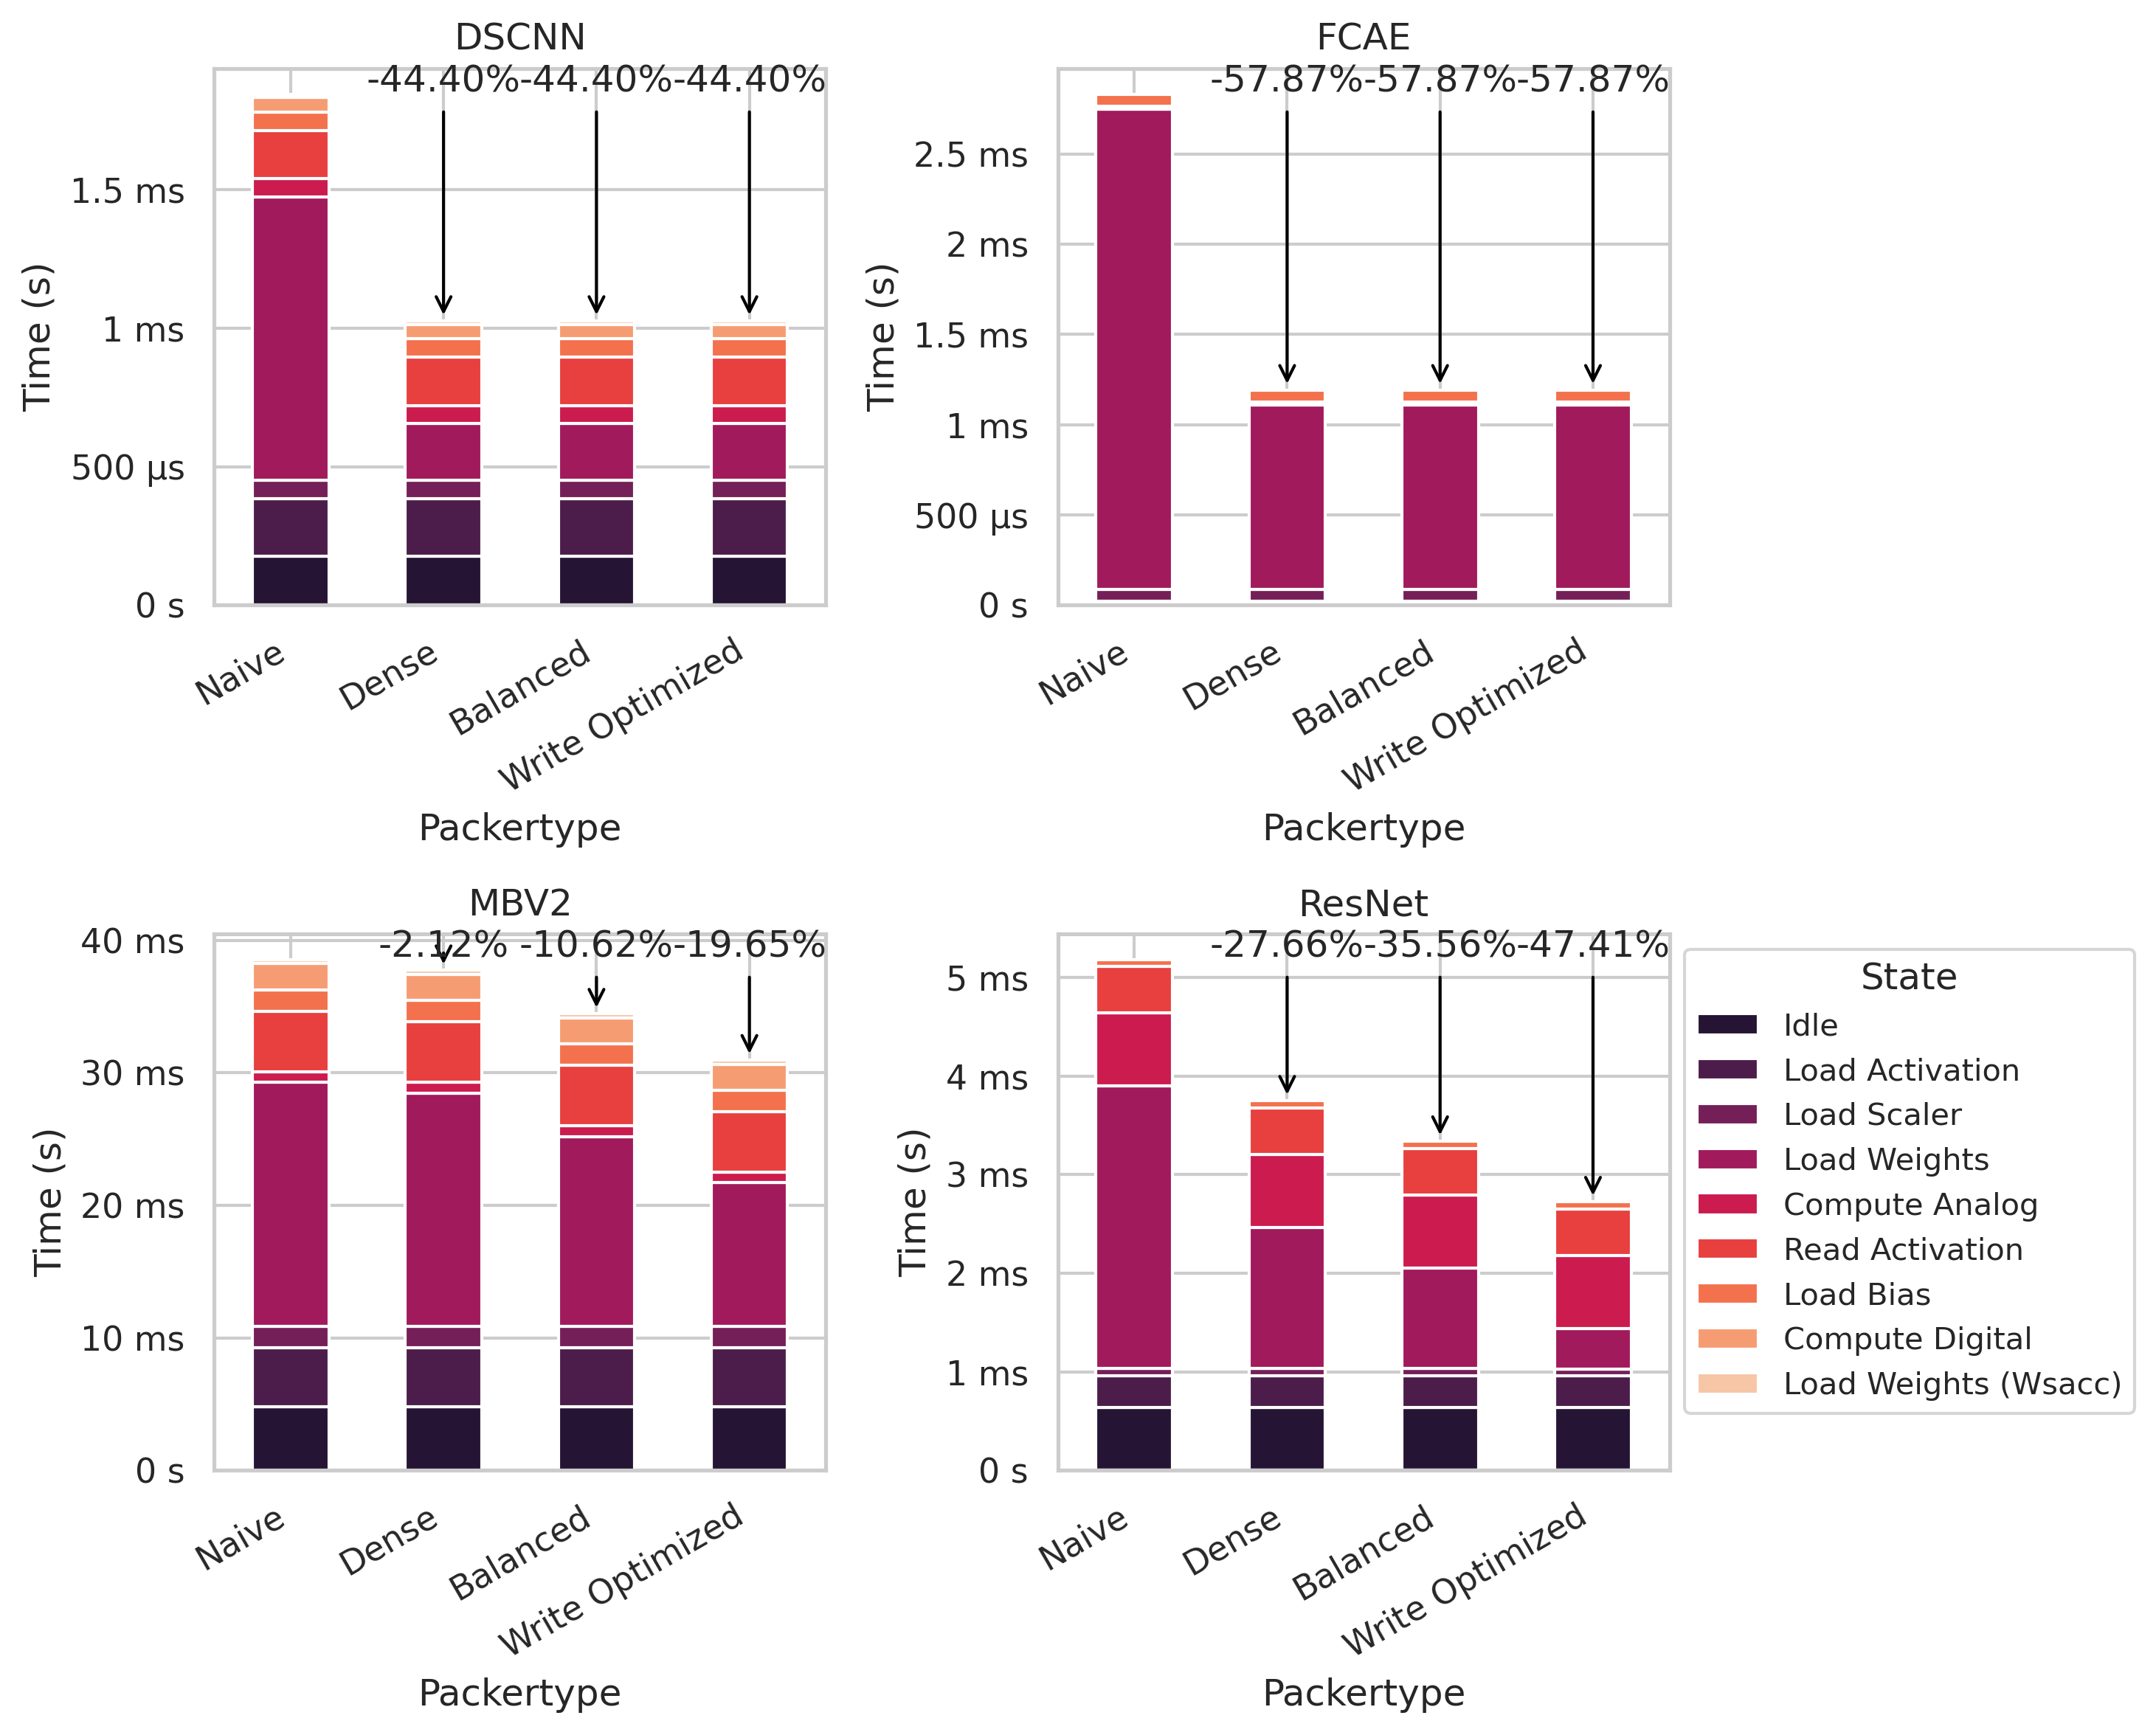

In [71]:
time_df = pd.read_csv('timeinstate.csv')

# Take only the highest Node Number for each Packertype
df_last = time_df.groupby(['Packertype', 'Model']).last().reset_index()
# Drop Total Time and Node Number columns
df_last = df_last.drop(columns=['Total Time', 'Node Number'])

# Plot each model separately as a group of bars using subplots
models = df_last['Model'].unique()
n_models = len(models)
n_rows = np.sqrt(n_models).astype(int)
n_cols = (n_models + n_rows - 1) // n_rows  # Ceiling
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), dpi=300, sharey=False)

if n_models == 1:
    axes = [axes]

for ax, model in zip(axes.flat, models):
    group = df_last[df_last['Model'] == model].set_index('Packertype')
    group.drop(columns=['Model'], inplace=True)
    # Ensure Naive is leftmost by reordering the index
    packer_order = ['Naive','Dense', 'Balanced', 'Write Optimized']
    group = group.reindex(packer_order)
    group.plot(
        kind='bar',
        stacked=True,
        color=sns.color_palette("rocket", n_colors=len(group.columns)),
        ax=ax,
        legend=False
    )
    ax.set_title(model)
    ax.set_xlabel('Packertype')
    ax.set_ylabel('Time (s)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    # Use engformatter for y-axis
    from matplotlib.ticker import EngFormatter
    eng_format = EngFormatter(unit='s')
    ax.yaxis.set_major_formatter(eng_format)
    # ax.set_ylim(0, 50e-3)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='State', fontsize='small')
plt.tight_layout()

# Add arrows and percent differences
# Always compare to the Naive packer type for each model
for m, ax in zip(models, axes.flat):
    group = df_last[df_last['Model'] == m].set_index('Packertype')
    if 'Naive' not in group.index:
        continue  # skip if Naive is not present
    naive_total_time = group.loc['Naive'].drop('Model').sum()
    group = group.reindex(packer_order)
    for i, packer_type in enumerate(group.index):
        total_time = group.loc[packer_type].drop('Model').sum()
        if packer_type == 'Naive':
            continue  # skip Naive itself
        percent_diff = (total_time - naive_total_time) / naive_total_time * 100
        ax.annotate(
            f'{percent_diff:.2f}%',
            xy=(i, total_time),
            xytext=(i, naive_total_time * (0.99)),
            arrowprops=dict(arrowstyle='->', color='black', lw=1),
            fontsize=12, ha='center', va='bottom'
        )

plt.savefig('qracc_latency_stacked_bar.svg', bbox_inches='tight')

In [72]:
time_df = pd.read_csv('timeinstate.csv')
time_df.drop('Total Time', axis=1, inplace=True)
time_df
# time_df.melt(id_vars=['Node Number'], var_name='State', value_name='Time')

Packertype  Model          Idle  Load Activation  Load Scaler  \
0         Naive   MBV2  3.000000e-07         0.000015     0.000005   
1         Naive   MBV2  4.146000e-05         0.000015     0.000010   
2         Naive   MBV2  8.262000e-05         0.000015     0.000015   
3         Naive   MBV2  2.261800e-04         0.000015     0.000020   
4         Naive   MBV2  2.673600e-04         0.000056     0.000026   
...         ...    ...           ...              ...          ...   
1411      Dense  DSCNN  1.133800e-04         0.000130     0.000046   
1412      Dense  DSCNN  1.391800e-04         0.000156     0.000051   
1413      Dense  DSCNN  1.451600e-04         0.000169     0.000056   
1414      Dense  DSCNN  1.511400e-04         0.000182     0.000061   
1415      Dense  DSCNN  1.769400e-04         0.000207     0.000067   

      Load Weights  Compute Analog  Read Activation  Load Bias  \
0         0.000205        0.000041         0.000000   0.000005   
1         0.000205        0.000041         0.000000   0.000010   
2         0.000409        0.000082         0.000000   0.000015   
3         0.000614        0.000123         0.000123   0.000020   
4         0.000614        0.000123         0.000164   0.000026   
...            ...             ...              ...        ...   
1411      0.000205        0.000039         0.000112   0.000046   
1412      0.000205        0.000052         0.000137   0.000051   
1413      0.000205        0.000052         0.000143   0.000056   
1414      0.000205        0.000052         0.000149   0.000061   
1415      0.000205        0.000065         0.000174   0.000067   

      Compute Digital  Load Weights (Wsacc)  Node Number  
0            0.000000              0.000000          1.0  
1            0.000046              0.000001          2.0  
2            0.000046              0.000001          3.0  
3            0.000046              0.000001          4.0  
4            0.000092              0.000003          8.0  
...               ...                   ...          ...  
1411         0.000040              0.000009         17.0  
1412         0.000040              0.000009         19.0  
1413         0.000046              0.000010         22.0  
1414         0.000053              0.000012         23.0  
1415         0.000053              0.000012         25.0  

[1416 rows x 12 columns]

In [73]:
seqacc_analog_model = pd.read_csv('seqacc_analog_model.csv')
# Convert the 'Value' column from engineering units to float
def eng_to_float(val):
    if isinstance(val, str):
        val = val.strip()
        # Fix for truncated units like 'u' instead of 'uW'
        if val.endswith('u'):
            val = val + 'W'
        if val.endswith('fJ'):
            return float(val.replace('fJ', '').strip()) * 1e-15
        elif val.endswith('pJ'):
            return float(val.replace('pJ', '').strip()) * 1e-12
        elif val.endswith('nJ'):
            return float(val.replace('nJ', '').strip()) * 1e-9
        elif val.endswith('uJ'):
            return float(val.replace('uJ', '').strip()) * 1e-6
        elif val.endswith('mJ'):
            return float(val.replace('mJ', '').strip()) * 1e-3
        elif val.endswith('uW'):
            return float(val.replace('uW', '').strip()) * 1e-6
        elif val.endswith('mW'):
            return float(val.replace('mW', '').strip()) * 1e-3
        elif val.endswith('nW'):
            return float(val.replace('nW', '').strip()) * 1e-9
        elif val.endswith('pW'):
            return float(val.replace('pW', '').strip()) * 1e-12
        elif val.endswith('fW'):
            return float(val.replace('fW', '').strip()) * 1e-15
        elif val.endswith('W'):
            return float(val.replace('W', '').strip())
        else:
            try:
                return float(val)
            except Exception as e:
                print(f"Warning: Could not convert value '{val}' to float: {e}")
                return None
    return val

seqacc_analog_model['Value_float'] = seqacc_analog_model['Value'].apply(eng_to_float)
# drop symbol and value columns
seqacc_analog_model = seqacc_analog_model.drop(columns=['Symbol', 'Value'])
# Rename the columns to be more descriptive
seqacc_analog_model = seqacc_analog_model.rename(columns={
    'Description': 'Description',
    'Value_float': 'Value',
})
seqacc_analog_model.to_csv('seqacc_analog_model_clean.csv', index=False)

In [74]:
per_state_powers = pd.read_csv('per_state_power_clean.csv')
seq_acc_analog_model = pd.read_csv('seqacc_analog_model_clean.csv')
mbv2_stat_df = pd.read_csv('qracc_statistics_combined.csv')
 
cycles_columns = [col for col in mbv2_stat_df.columns if col.startswith('cycles')]
for col in cycles_columns:
    # remove the 'cycles' prefix from the column name
    mbv2_stat_df[f'time_{col}'] = mbv2_stat_df[col] * 20e-9  # 20ns in seconds
    # drop the original cycles column
    mbv2_stat_df = mbv2_stat_df.drop(columns=[col])

# Clean column names to human readable format
def clean_col(col):
    col = col.replace('_', ' ')
    col = col.replace('cycles', '')
    col = col.replace('time', '')
    col = col.replace('Idle', 'Idle')
    col = col.replace('LoadActivation', ' Load Activation')
    col = col.replace('LoadScaler', ' Load Scaler')
    col = col.replace('LoadWeights', ' Load Weights')
    col = col.replace('ComputeAnalog', ' Compute Analog')
    col = col.replace('ReadActivation', ' Read Activation')
    col = col.replace('LoadBias', ' Load Bias')
    col = col.replace('ComputeDigital', ' Compute Digital')
    col = col.replace('Load Weightsdigital', ' Load Weights (WSAcc)')
    col = col.replace('Total Time', 'Total Time')
    # Remove double spaces
    col = ' '.join(col.split())
    # Capitalize each word
    col = col.title()
    return col

mbv2_stat_df.columns = [clean_col(c) for c in mbv2_stat_df.columns]

state_columns = [col for col in mbv2_stat_df.columns if col in per_state_powers.columns]

per_state_powers.set_index('Module', inplace=True)
energy_df = pd.DataFrame()
for state in state_columns:
    if state in per_state_powers.columns:
        # Use 'Total Power' row for each state
        power = per_state_powers.loc['Total Power', state]
        energy_df[f'Energy {state}'] = mbv2_stat_df[state] * power

# 3. Add the energy columns to mbv2_stat_df or keep as a separate DataFrame
mbv2_stat_df = pd.concat([mbv2_stat_df, energy_df], axis=1)

# Show the resulting DataFrame
mbv2_stat_df.to_csv('qracc_statistics_with_energy_noanalog.csv', index=False)

In [75]:
mbv2_stat_df = pd.read_csv('qracc_statistics_with_energy_noanalog.csv')
seqacc_analog_model = pd.read_csv('seqacc_analog_model_clean.csv')

power_per_column = seqacc_analog_model.iloc[4].Value

# Energy SeqAcc is core
seqacc_power_total = power_per_column * mbv2_stat_df['Kernel Out Channels']
seqacc_energy_total = seqacc_power_total * mbv2_stat_df['Compute Analog']
mbv2_stat_df['Energy SeqAcc Core'] = seqacc_energy_total

write_power_per_bit = seqacc_analog_model.iloc[5].Value * 32  # 32 bits per word
mbv2_stat_df['Energy SeqAcc Write'] = mbv2_stat_df['Load Weights'] * write_power_per_bit

# add a total energy column
mbv2_stat_df['Total Energy'] = mbv2_stat_df.filter(like='Energy').sum(axis=1)

# Save the final DataFrame
mbv2_stat_df.to_csv('qracc_statistics_with_energy.csv', index=False)

In [76]:
mbv2_stat_df

Time  Actmemextreads  Actmemextwrites  Actmemintreads  \
0     0.000272               0              768             783   
1     0.000371               0                0            2310   
2     0.000668               0                0             271   
3     0.001191            6145                0             273   
4     0.001372            2049             2048            2310   
...        ...             ...              ...             ...   
1411  0.000740             289              640             330   
1412  0.000840            1281             1280             176   
1413  0.000883             289              640             330   
1414  0.000926             289              640             330   
1415  0.001026            1281             1280             176   

      Actmemintwrites  Flreads  Flwrites  Seqaccweightwrites  \
0                 256        0       783                2048   
1                 256        0      2310                   0   
2                 256        0       271                2048   
3                 768        0       273                2048   
4                 256        0      2310                   0   
...               ...      ...       ...                 ...   
1411               36        0       330                   0   
1412              160        0       176                   0   
1413               36        0       330                   0   
1414               36        0       330                   0   
1415              160        0       176                   0   

      Seqaccoperations  Seqaccmacs  ...  Compute Digital  Load Weightsdigital  \
0                  256        2048  ...         0.000000             0.000000   
1                    0           0  ...         0.000046             0.000001   
2                  256        2048  ...         0.000000             0.000000   
3                  256        2048  ...         0.000000             0.000000   
4                    0           0  ...         0.000046             0.000001   
...                ...         ...  ...              ...                  ...   
1411                 0           0  ...         0.000007             0.000001   
1412                80         640  ...         0.000000             0.000000   
1413                 0           0  ...         0.000007             0.000001   
1414                 0           0  ...         0.000007             0.000001   
1415                80         640  ...         0.000000             0.000000   

       Energy Idle Energy Load Weights  Energy Compute Analog  \
0     2.667668e-12        1.839762e-09           9.011323e-10   
1     3.660040e-10        0.000000e+00           0.000000e+00   
2     3.660040e-10        1.839762e-09           9.002566e-10   
3     1.276568e-09        1.839762e-09           9.011323e-10   
4     3.661819e-10        0.000000e+00           0.000000e+00   
...            ...                 ...                    ...   
1411  5.317551e-11        0.000000e+00           0.000000e+00   
1412  2.294194e-10        0.000000e+00           2.846142e-10   
1413  5.317551e-11        0.000000e+00           0.000000e+00   
1414  5.317551e-11        0.000000e+00           0.000000e+00   
1415  2.294194e-10        0.000000e+00           2.846142e-10   

      Energy Load Bias Energy Compute Digital Energy SeqAcc Core  \
0         4.617086e-11           0.000000e+00       6.624323e-08   
1         4.617086e-11           4.905932e-10       0.000000e+00   
2         4.617086e-11           0.000000e+00       3.308943e-08   
3         4.617086e-11           0.000000e+00       1.987297e-07   
4         4.617086e-11           4.905932e-10       0.000000e+00   
...                ...                    ...                ...   
1411      4.617086e-11           7.008474e-11       0.000000e+00   
1412      4.617086e-11           0.000000e+00       4.184461e-08   
1413      4.617086e-11           7.008474e-11       0.000000e+00   
14

In [77]:
# Calculate OPS (Operations) column
# OP = 2 multiply-accumulates (MACs)
# Typically, OPS = 2 * ifmap_size * kernel_out_channels
if 'Ifmap Size' in mbv2_stat_df.columns and 'Kernel Out Channels' in mbv2_stat_df.columns and 'Depthwise' in mbv2_stat_df.columns:
    mbv2_stat_df['OPS'] = np.where(
        mbv2_stat_df['Depthwise'].astype(bool),
        2 * mbv2_stat_df['Ifmap Size'],
        2 * mbv2_stat_df['Ifmap Size'] * mbv2_stat_df['Kernel Out Channels']
    )
else:
    print('Required columns for OPS calculation not found.')
# Save the updated DataFrame
mbv2_stat_df.to_csv('mbv2_qracc_statistics_with_ops.csv', index=False)

mbv2_stat_df['Joules per OP'] = mbv2_stat_df['Total Energy'] / mbv2_stat_df['OPS']
mbv2_stat_df['TOPS/W'] = (1/mbv2_stat_df['Joules per OP'])/1e12  # Convert to TOPS/W
mbv2_stat_df.to_csv('mbv2_qracc_statistics_with_ops_and_energy.csv', index=False)

In [78]:
mbv2_stat_df

Time  Actmemextreads  Actmemextwrites  Actmemintreads  \
0     0.000272               0              768             783   
1     0.000371               0                0            2310   
2     0.000668               0                0             271   
3     0.001191            6145                0             273   
4     0.001372            2049             2048            2310   
...        ...             ...              ...             ...   
1411  0.000740             289              640             330   
1412  0.000840            1281             1280             176   
1413  0.000883             289              640             330   
1414  0.000926             289              640             330   
1415  0.001026            1281             1280             176   

      Actmemintwrites  Flreads  Flwrites  Seqaccweightwrites  \
0                 256        0       783                2048   
1                 256        0      2310                   0   
2                 256        0       271                2048   
3                 768        0       273                2048   
4                 256        0      2310                   0   
...               ...      ...       ...                 ...   
1411               36        0       330                   0   
1412              160        0       176                   0   
1413               36        0       330                   0   
1414               36        0       330                   0   
1415              160        0       176                   0   

      Seqaccoperations  Seqaccmacs  ...  Energy Load Weights  \
0                  256        2048  ...         1.839762e-09   
1                    0           0  ...         0.000000e+00   
2                  256        2048  ...         1.839762e-09   
3                  256        2048  ...         1.839762e-09   
4                    0           0  ...         0.000000e+00   
...                ...         ...  ...                  ...   
1411                 0           0  ...         0.000000e+00   
1412                80         640  ...         0.000000e+00   
1413                 0           0  ...         0.000000e+00   
1414                 0           0  ...         0.000000e+00   
1415                80         640  ...         0.000000e+00   

      Energy Compute Analog Energy Load Bias Energy Compute Digital  \
0              9.011323e-10     4.617086e-11           0.000000e+00   
1              0.000000e+00     4.617086e-11           4.905932e-10   
2              9.002566e-10     4.617086e-11           0.000000e+00   
3              9.011323e-10     4.617086e-11           0.000000e+00   
4              0.000000e+00     4.617086e-11           4.905932e-10   
...                     ...              ...                    ...   
1411           0.000000e+00     4.617086e-11           7.008474e-11   
1412           2.846142e-10     4.617086e-11           0.000000e+00   
1413           0.000000e+00     4.617086e-11           7.008474e-11   
1414           0.000000e+00     4.617086e-11           7.008474e-11   
1415           2.846142e-10     4.617086e-11           0.000000e+00   

      Energy SeqAcc Core  Energy SeqAcc Write  Total Energy       OPS  \
0           6.624323e-08         9.657176e-08  1.656047e-07  196608.0   
1           0.000000e+00         0.000000e+00  9.027681e-10   16384.0   
2           3.308943e-08         9.657176e-08  1.328134e-07  262144.0   
3           1.987297e-07         9.657176e-08  2.993651e-07  786432.0   
4           0.000000e+00         0.000000e+00  9.029459e-10   16384.0   
...                  ...                  ...           ...       ...   
1411        0.000000e+00         0.000000e+00  1.694311e-10    5120.0   
1412        4.184461e-08         0.000000e+00  4.240481e-08  655360.0   
1413        0.000000e+00         0.000000e+00  1.694311e-10    5120.0   
1414        0.000000e+00         0.000000e+00  1.694311e-10    5120.0   
1415       

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


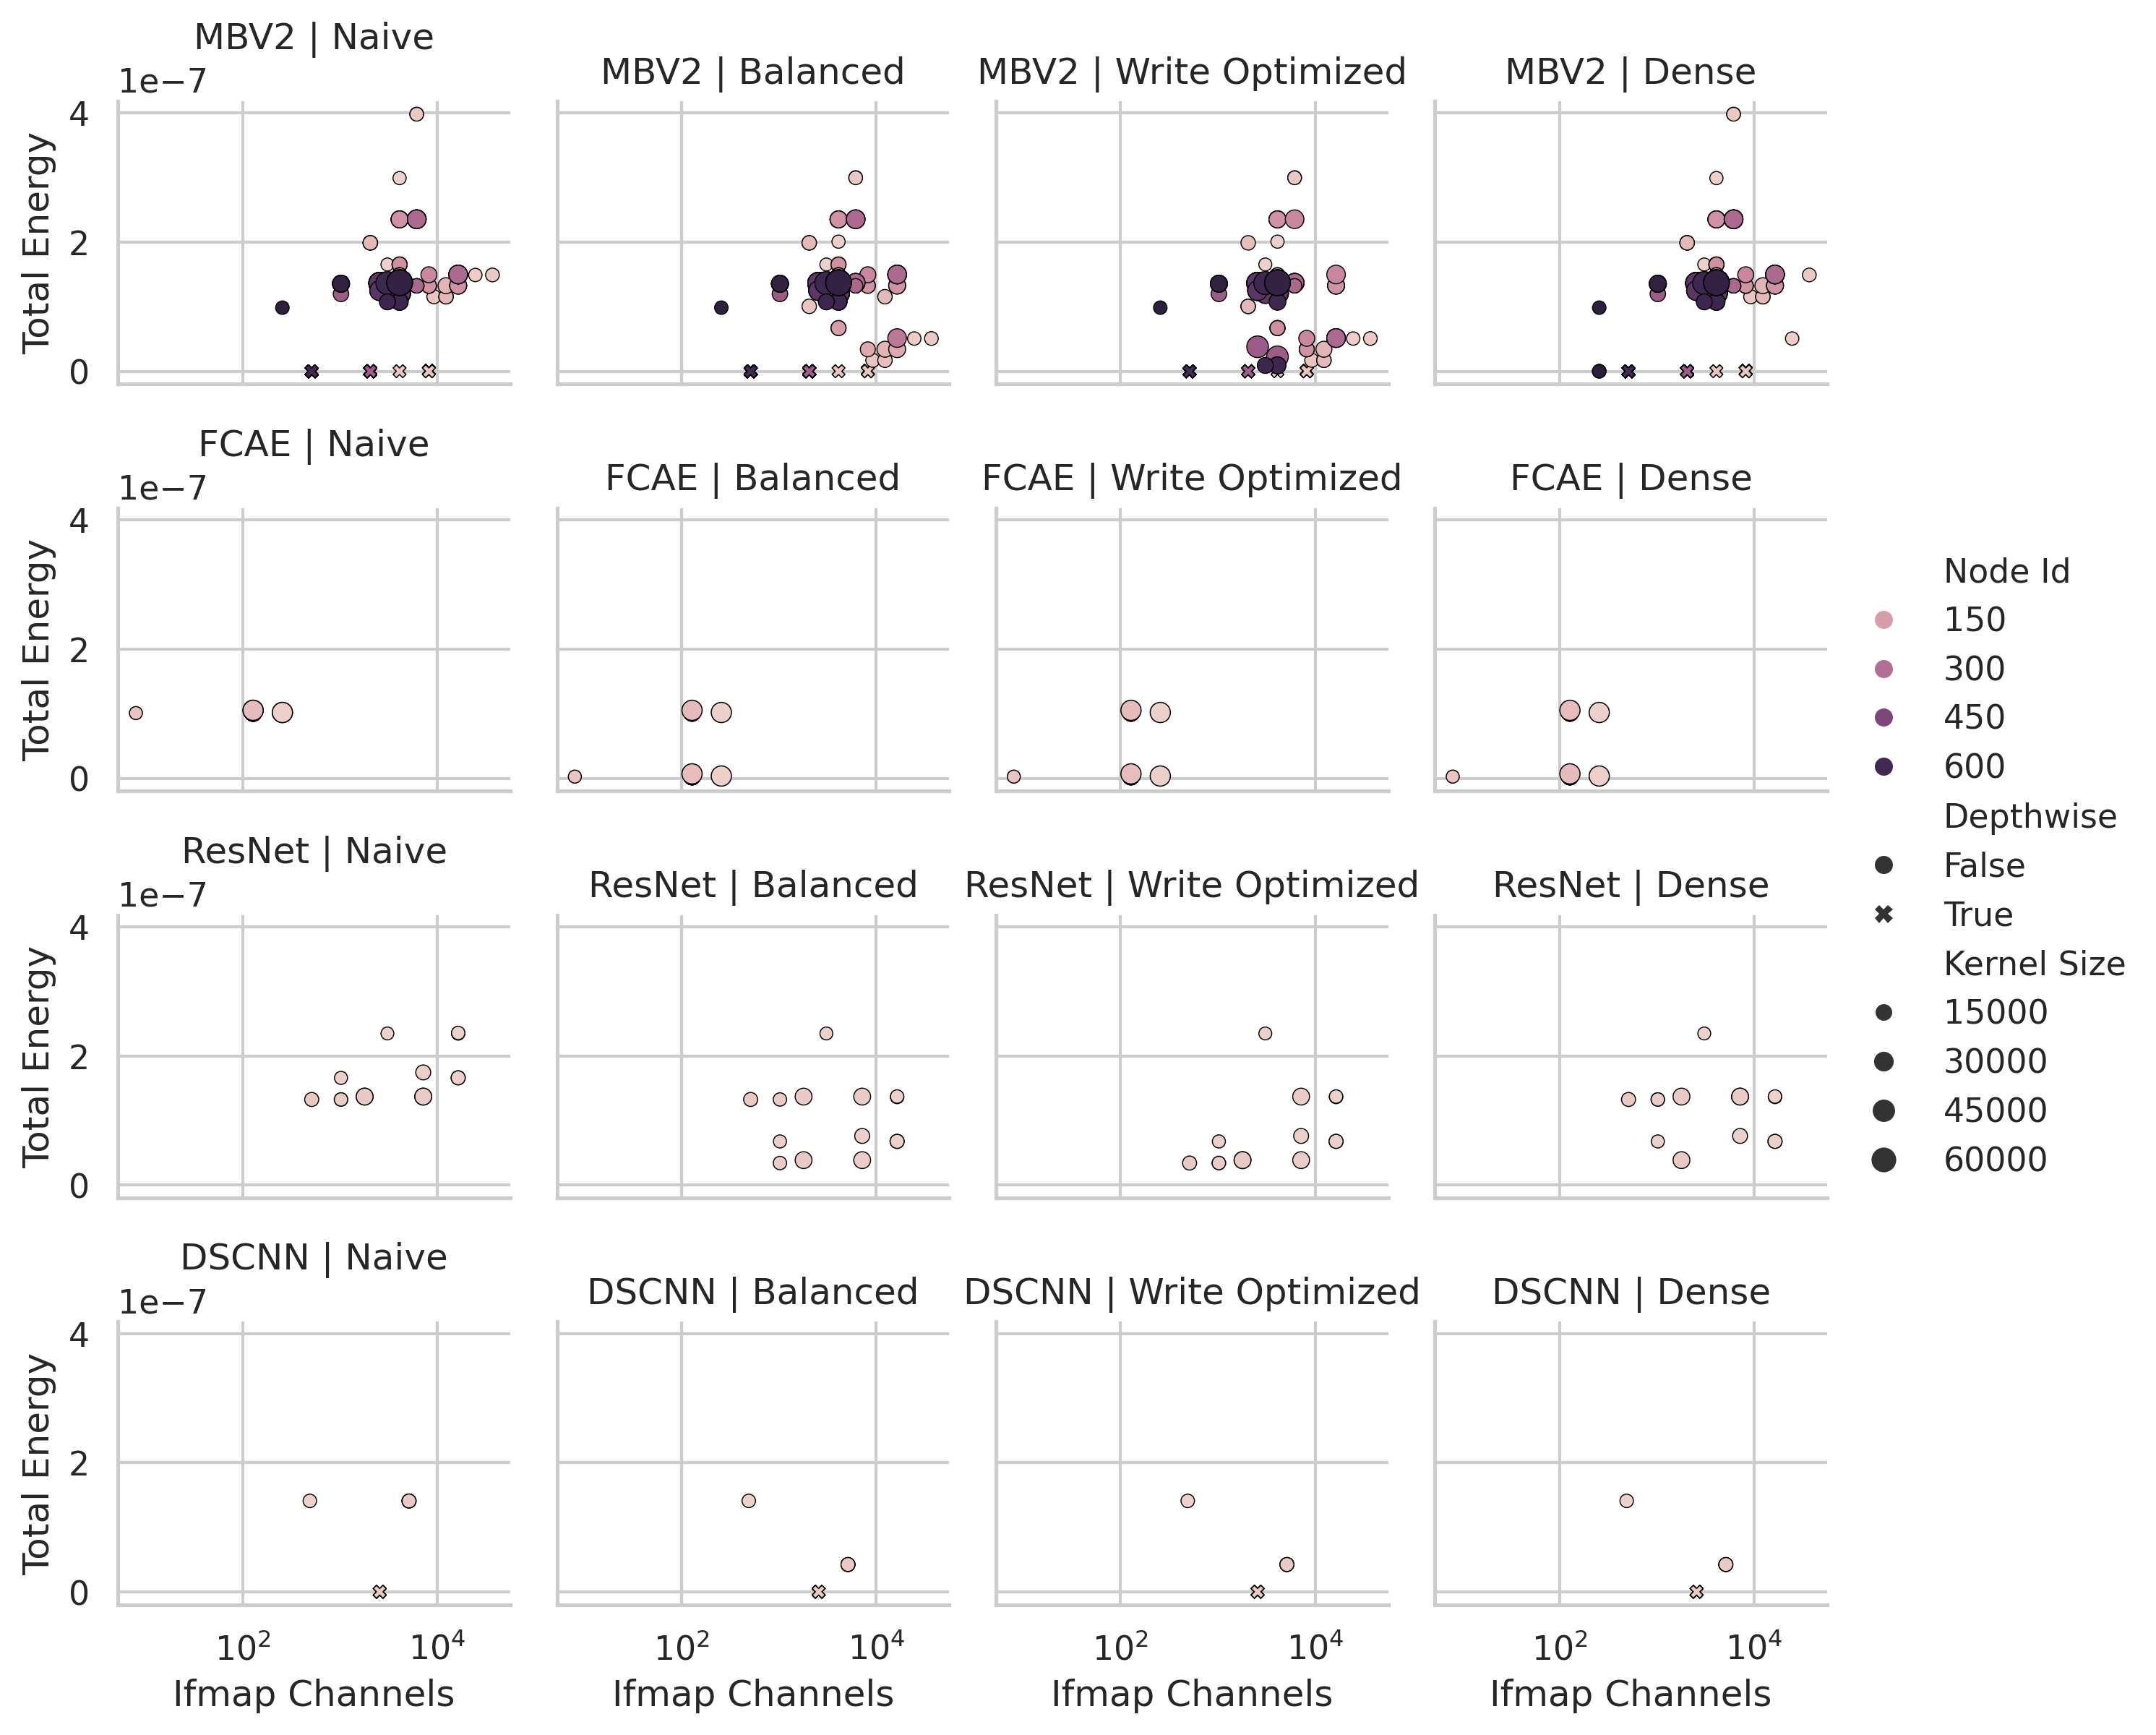

In [79]:
mbv2_stat_df = pd.read_csv('mbv2_qracc_statistics_with_ops_and_energy.csv')

# Duration vs Ifmap size vs Layer type Scatter

# mbv2_stat_df = mbv2_stat_df[mbv2_stat_df['Load Weights'] > 0]

sns.set_theme(style="whitegrid")
# sns.scatterplot(data=mbv2_stat_df, x='Ifmap Size', y='TOPS/W', hue='Node Id', style='Depthwise', ax=ax, edgecolor='black')
g = sns.relplot(
	data=mbv2_stat_df,
	x='Ifmap Size',
	y='Total Energy',
	hue='Node Id',
	style='Depthwise',
	kind='scatter',
	col='Packertype',
	row='Model',
	facet_kws={'sharey': True, 'sharex': True},
	edgecolor='black',
	size='Kernel Size',
	height=3,
	aspect=1
)
# Add lines between points based on index

# Set DPI to 300
g.fig.set_dpi(300)
g.fig.set_size_inches(10, 8)

# set engformatter

from matplotlib.ticker import EngFormatter
eng_format_y = EngFormatter(unit='J')
eng_format_x = EngFormatter(unit='B')
# ax.yaxis.set_major_formatter(eng_format_y)
# ax.xaxis.set_major_formatter(eng_format_x)
for ax in g.axes.flat:
	# ax.yaxis.set_major_formatter(eng_format_y)
	ax.xaxis.set_major_formatter(eng_format_x)
	# Add linebreaks to x-axis label
	ax.set_xlabel('Ifmap Channels')

# remove "Packertype" from the facet titles
for ax in g.axes.flat:
	ax.set_title(ax.get_title().replace('Packertype = ', ''))
	ax.set_title(ax.get_title().replace('Model = ', ''))

# set legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1.6, 1), borderaxespad=0., frameon=False)
plt.tight_layout()
plt.xscale('log')
# plt.yscale('log')
# replace node_id with Node Number

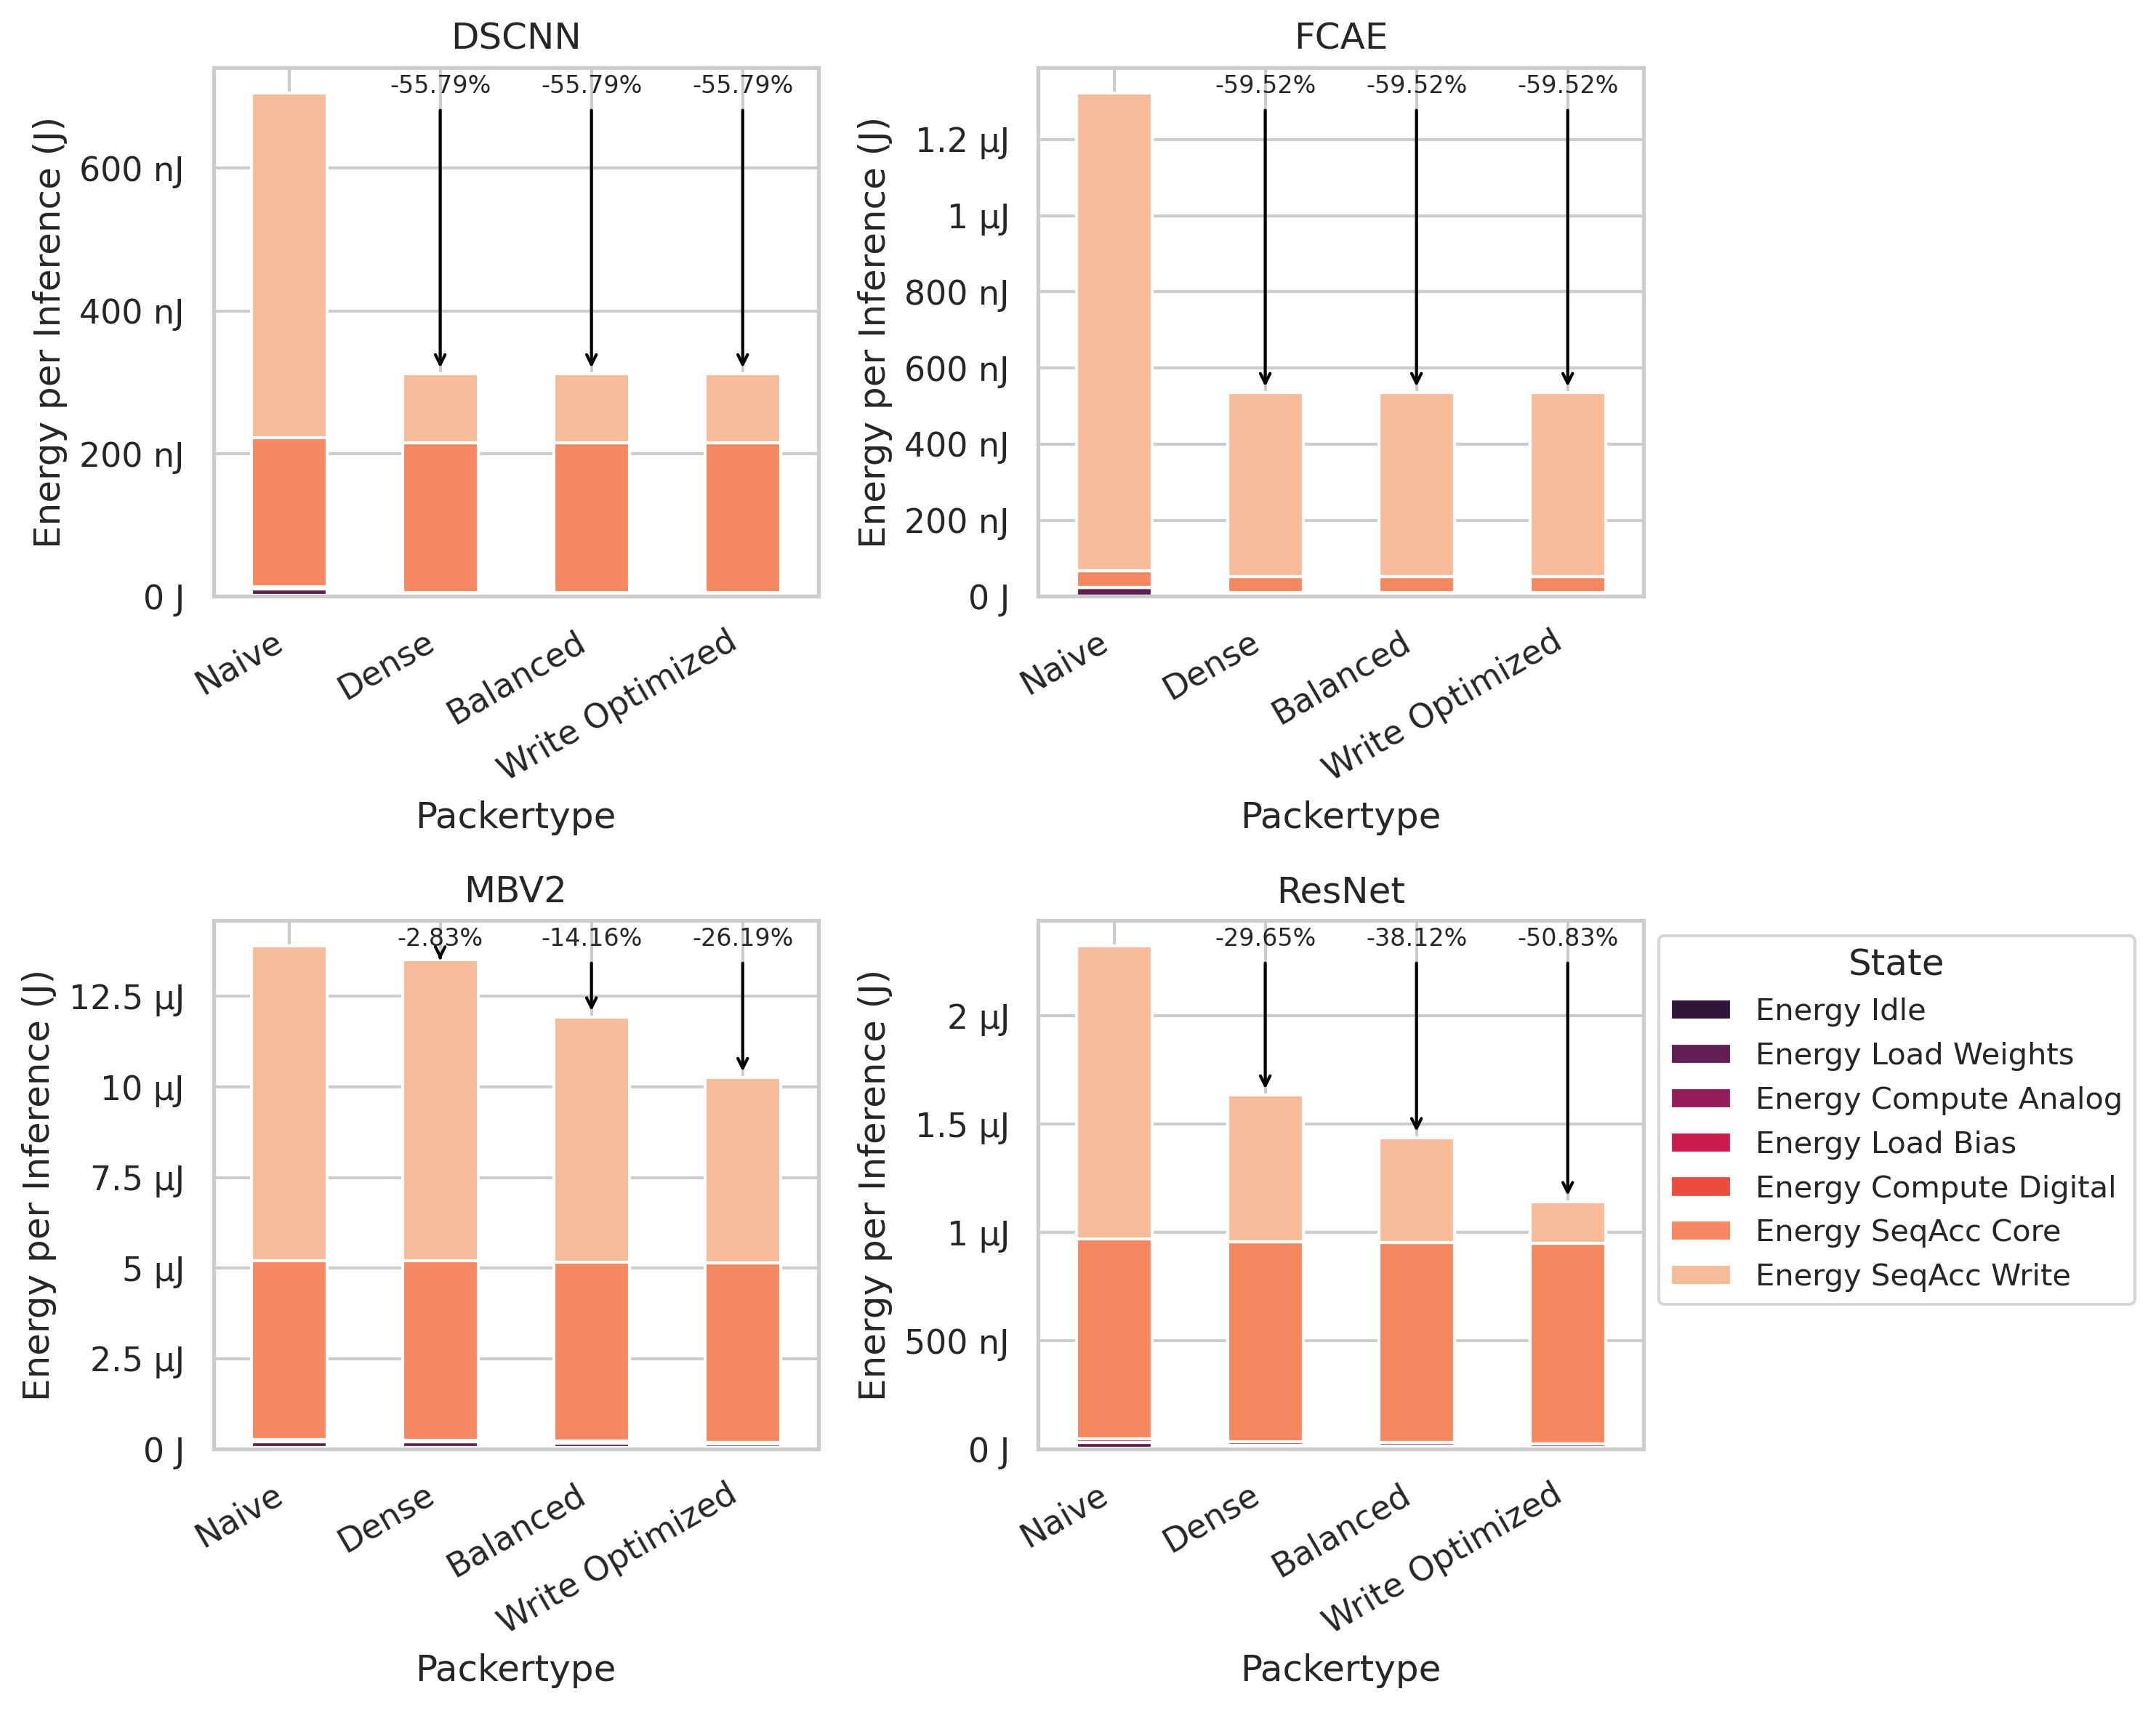

In [80]:
mbv2_stat_df = pd.read_csv('mbv2_qracc_statistics_with_ops_and_energy.csv')

# Sum the energy columns for each PackerType over the Node Id
df_last = mbv2_stat_df.groupby(['Packertype','Model']).sum(numeric_only=True)

energy_columns = [col for col in df_last.columns if col.startswith('Energy')]
# remove the 'Total Energy' column
energy_columns = [col for col in energy_columns if col != 'Energy Total']
# Create a new DataFrame with only the energy columns and PackerType
df_last = df_last[energy_columns].reset_index()

df_last

# Only keep the energy columns for plotting
energy_columns = [col for col in df_last.columns if col.startswith('Energy')]
df_plot = df_last.set_index('Packertype')[energy_columns]

# Plot each model separately as a group of bars using subplots
models = df_last['Model'].unique()
n_rows = np.sqrt(n_models).astype(int)
n_cols = (n_models + n_rows - 1) // n_rows  # Ceiling
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), dpi=300, sharey=False)

if n_models == 1:
    axes = [axes]

for ax, model in zip(axes.flat, models):
    group = df_last[df_last['Model'] == model].set_index('Packertype')
    group.drop(columns=['Model'], inplace=True)
    packer_order = ['Naive','Dense', 'Balanced', 'Write Optimized']
    group = group.reindex(packer_order)
    group.plot(
        kind='bar',
        stacked=True,
        color=sns.color_palette("rocket", n_colors=len(group.columns)),
        ax=ax,
        legend=False
    )
    ax.set_title(model)
    ax.set_xlabel('Packertype')
    ax.set_ylabel('Energy per Inference (J)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    # Use engformatter for y-axis
    from matplotlib.ticker import EngFormatter
    eng_format = EngFormatter(unit='J')
    ax.yaxis.set_major_formatter(eng_format)
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='State', fontsize='small')
plt.tight_layout()

# Add arrows and percent differences
# Always compare to the Naive packer type for each model
for m, ax in zip(models, axes.flat):
    group = df_last[df_last['Model'] == m].set_index('Packertype')
    if 'Naive' not in group.index:
        continue  # skip if Naive is not present
    naive_total_time = group.loc['Naive'].drop('Model').sum()
    packer_order = ['Naive','Dense', 'Balanced', 'Write Optimized']
    group = group.reindex(packer_order)
    for i, packer_type in enumerate(group.index):
        total_time = group.loc[packer_type].drop('Model').sum()
        if packer_type == 'Naive':
            continue  # skip Naive itself
        percent_diff = (total_time - naive_total_time) / naive_total_time * 100
        ax.annotate(
            f'{percent_diff:.2f}%',
            xy=(i, total_time),
            xytext=(i, naive_total_time * (0.99)),
            arrowprops=dict(arrowstyle='->', color='black', lw=1),
            fontsize=8, ha='center', va='bottom'
        )

# plt.yscale('log')
plt.savefig('qracc_energy_stacked_bar.svg', bbox_inches='tight')

In [81]:
mbv2_stat_df

Time  Actmemextreads  Actmemextwrites  Actmemintreads  \
0     0.000272               0              768             783   
1     0.000371               0                0            2310   
2     0.000668               0                0             271   
3     0.001191            6145                0             273   
4     0.001372            2049             2048            2310   
...        ...             ...              ...             ...   
1411  0.000740             289              640             330   
1412  0.000840            1281             1280             176   
1413  0.000883             289              640             330   
1414  0.000926             289              640             330   
1415  0.001026            1281             1280             176   

      Actmemintwrites  Flreads  Flwrites  Seqaccweightwrites  \
0                 256        0       783                2048   
1                 256        0      2310                   0   
2                 256        0       271                2048   
3                 768        0       273                2048   
4                 256        0      2310                   0   
...               ...      ...       ...                 ...   
1411               36        0       330                   0   
1412              160        0       176                   0   
1413               36        0       330                   0   
1414               36        0       330                   0   
1415              160        0       176                   0   

      Seqaccoperations  Seqaccmacs  ...  Energy Load Weights  \
0                  256        2048  ...         1.839762e-09   
1                    0           0  ...         0.000000e+00   
2                  256        2048  ...         1.839762e-09   
3                  256        2048  ...         1.839762e-09   
4                    0           0  ...         0.000000e+00   
...                ...         ...  ...                  ...   
1411                 0           0  ...         0.000000e+00   
1412                80         640  ...         0.000000e+00   
1413                 0           0  ...         0.000000e+00   
1414                 0           0  ...         0.000000e+00   
1415                80         640  ...         0.000000e+00   

      Energy Compute Analog Energy Load Bias Energy Compute Digital  \
0              9.011323e-10     4.617086e-11           0.000000e+00   
1              0.000000e+00     4.617086e-11           4.905932e-10   
2              9.002566e-10     4.617086e-11           0.000000e+00   
3              9.011323e-10     4.617086e-11           0.000000e+00   
4              0.000000e+00     4.617086e-11           4.905932e-10   
...                     ...              ...                    ...   
1411           0.000000e+00     4.617086e-11           7.008474e-11   
1412           2.846142e-10     4.617086e-11           0.000000e+00   
1413           0.000000e+00     4.617086e-11           7.008474e-11   
1414           0.000000e+00     4.617086e-11           7.008474e-11   
1415           2.846142e-10     4.617086e-11           0.000000e+00   

      Energy SeqAcc Core  Energy SeqAcc Write  Total Energy       OPS  \
0           6.624323e-08         9.657176e-08  1.656047e-07  196608.0   
1           0.000000e+00         0.000000e+00  9.027681e-10   16384.0   
2           3.308943e-08         9.657176e-08  1.328134e-07  262144.0   
3           1.987297e-07         9.657176e-08  2.993651e-07  786432.0   
4           0.000000e+00         0.000000e+00  9.029459e-10   16384.0   
...                  ...                  ...           ...       ...   
1411        0.000000e+00         0.000000e+00  1.694311e-10    5120.0   
1412        4.184461e-08         0.000000e+00  4.240481e-08  655360.0   
1413        0.000000e+00         0.000000e+00  1.694311e-10    5120.0   
1414        0.000000e+00         0.000000e+00  1.694311e-10    5120.0   
1415       

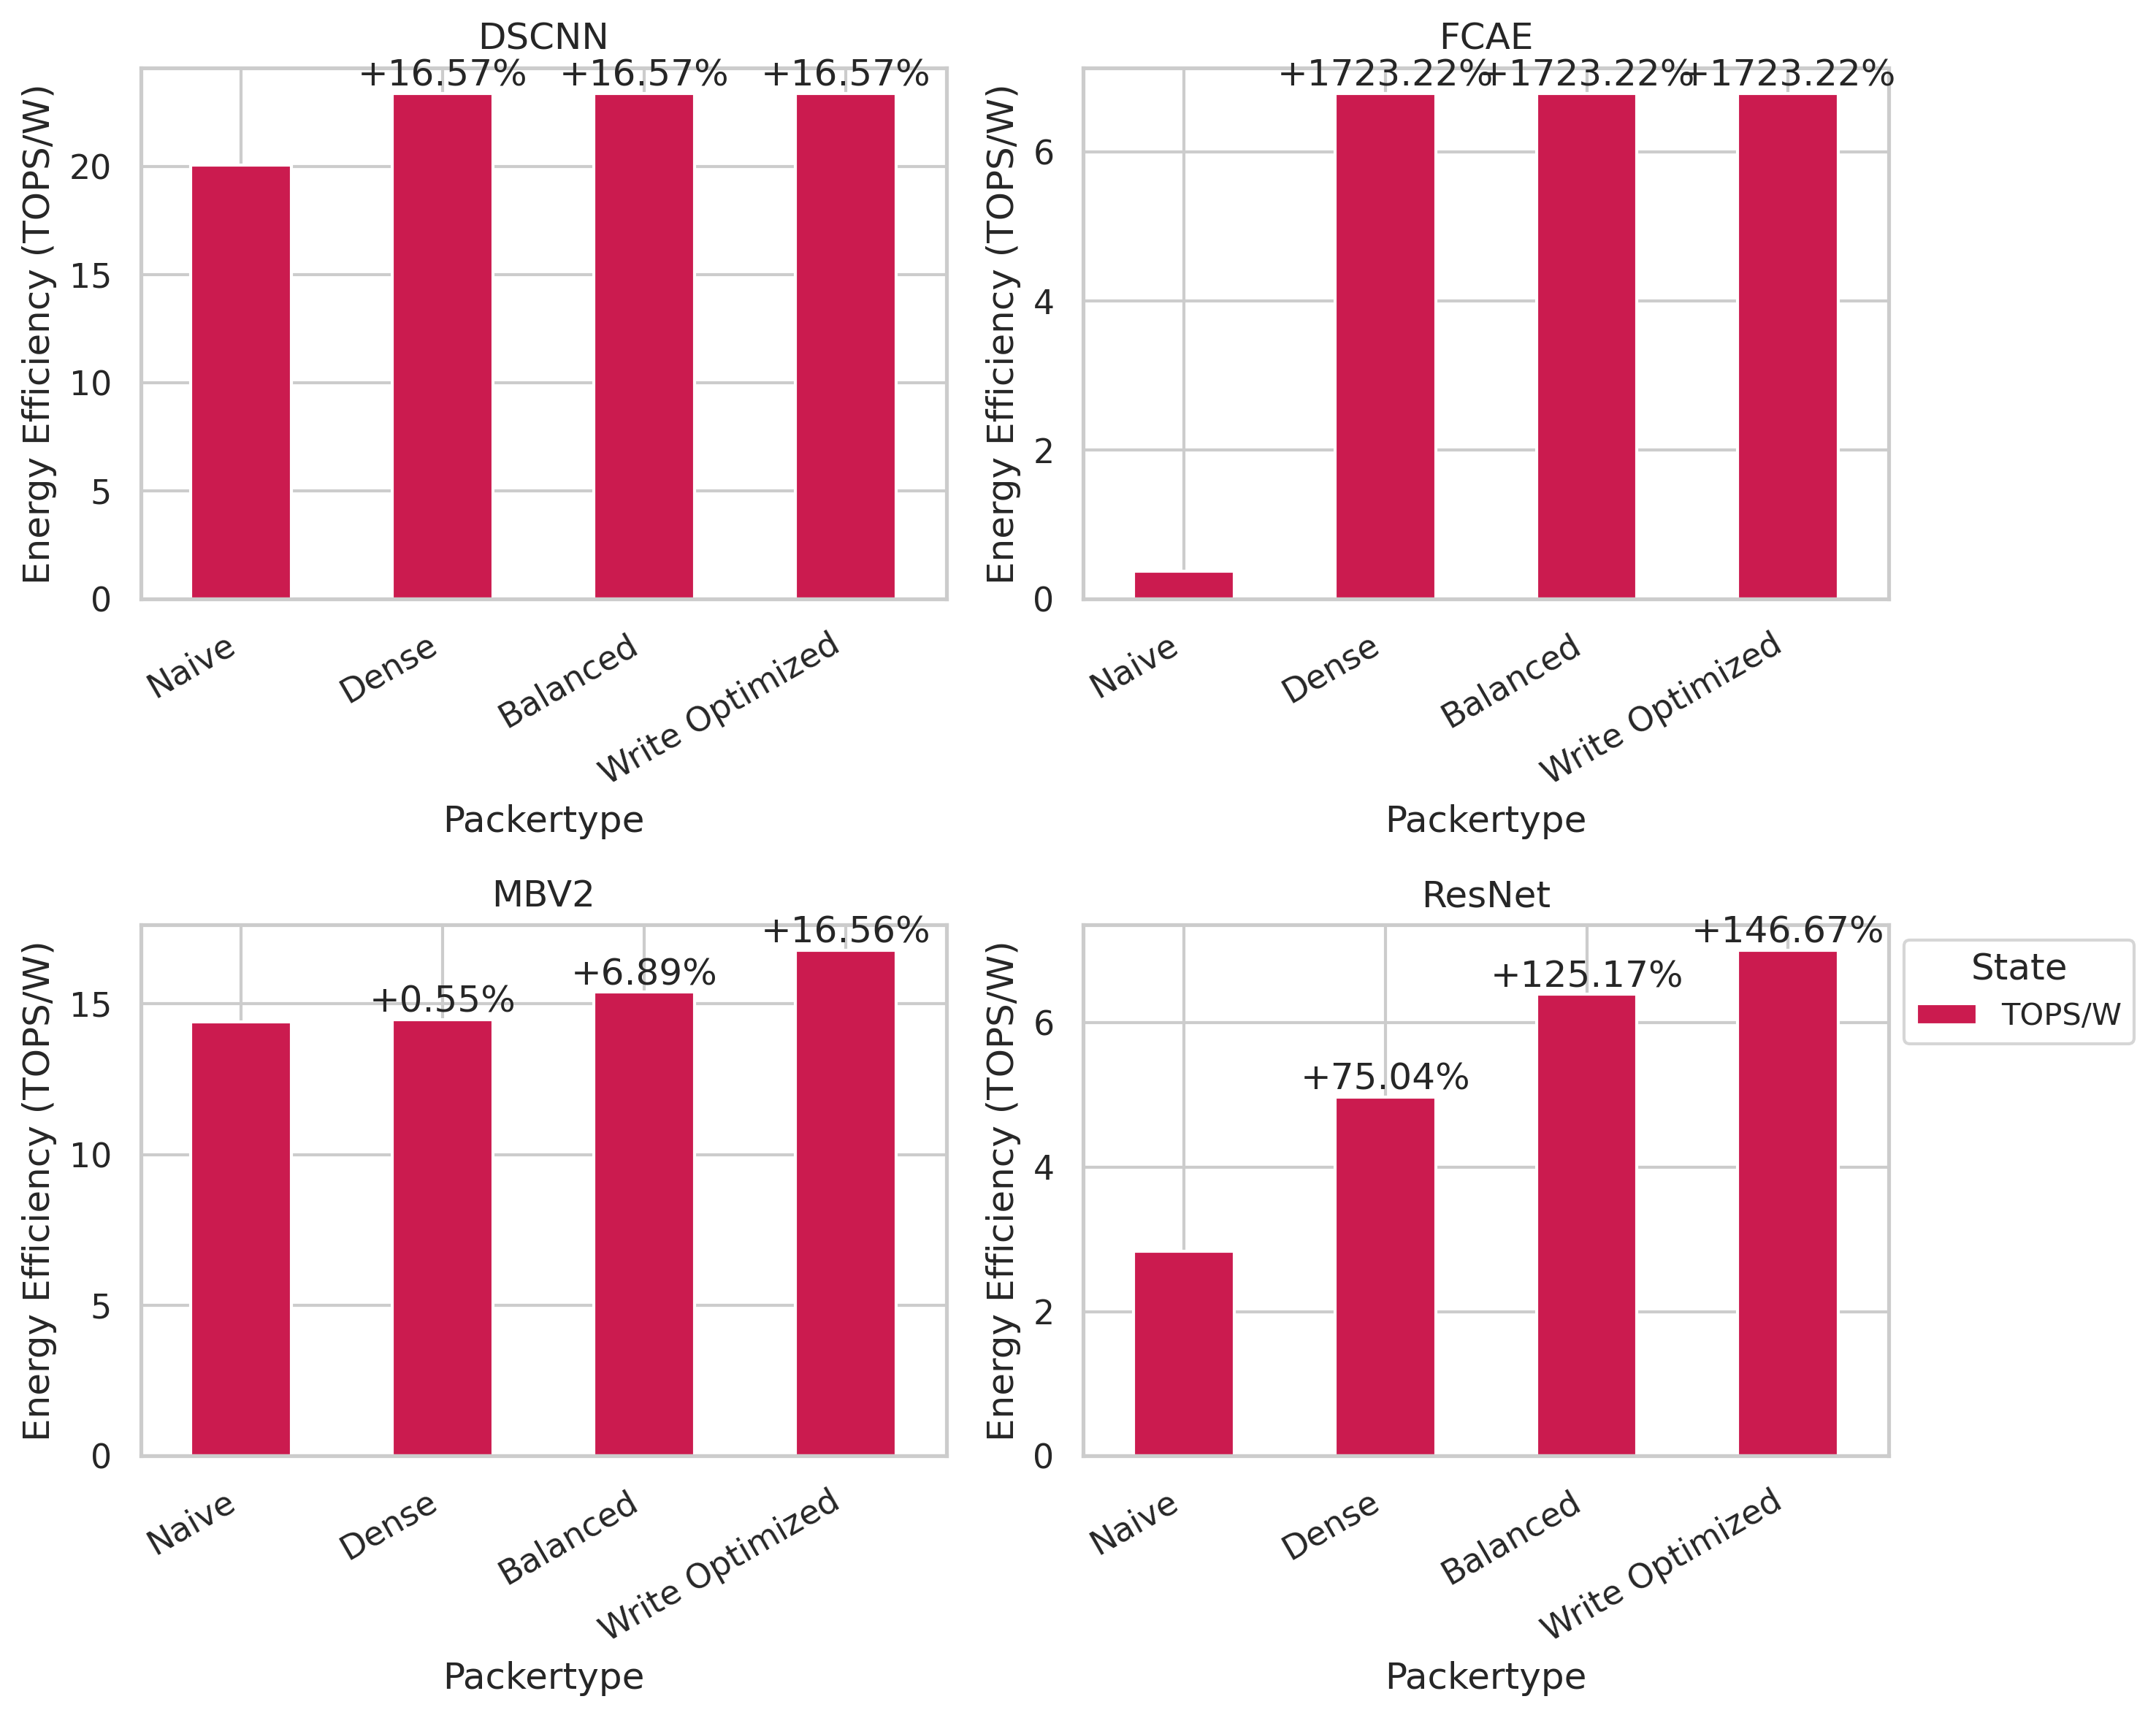

In [82]:
mbv2_stat_df = pd.read_csv('mbv2_qracc_statistics_with_ops_and_energy.csv')

# Sum the energy columns for each PackerType over the Node Id
df_last = mbv2_stat_df.groupby(['Packertype','Model']).mean(numeric_only=True)

# Create a new DataFrame with only the energy columns and PackerType
df_last = df_last[['TOPS/W']].reset_index()
df_last

# Only keep the energy columns for plotting
df_plot = df_last.set_index('Packertype')['TOPS/W']

# Plot each model separately as a group of bars using subplots
models = df_last['Model'].unique()
n_rows = np.sqrt(n_models).astype(int)
n_cols = (n_models + n_rows - 1) // n_rows  # Ceiling
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), dpi=300, sharey=False)

for ax, model in zip(axes.flat, models):
    group = df_last[df_last['Model'] == model].set_index('Packertype')
    group.drop(columns=['Model'], inplace=True)
    packer_order = ['Naive','Dense', 'Balanced', 'Write Optimized']
    group = group.reindex(packer_order)
    group.plot(
        kind='bar',
        stacked=True,
        color=sns.color_palette("rocket", n_colors=len(group.columns)),
        ax=ax,
        legend=False
    )
    ax.set_title(model)
    ax.set_xlabel('Packertype')
    ax.set_ylabel('Energy Efficiency (TOPS/W)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    # Use engformatter for y-axis
    from matplotlib.ticker import EngFormatter
    eng_format = EngFormatter()
    ax.yaxis.set_major_formatter(eng_format)
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='State', fontsize='small')
plt.tight_layout()

# Add arrows and percent differences
# Always compare to the Naive packer type for each model
for m, ax in zip(models, axes.flat):
    group = df_last[df_last['Model'] == m].set_index('Packertype')
    if 'Naive' not in group.index:
        continue  # skip if Naive is not present
    naive_value = group.loc['Naive']['TOPS/W']
    packer_order = ['Naive','Dense', 'Balanced', 'Write Optimized']
    group = group.reindex(packer_order)
    for i, packer_type in enumerate(group.index):
        value = group.loc[packer_type]['TOPS/W']
        if packer_type == 'Naive':
            continue  # skip Naive itself
        percent_diff = (value - naive_value) / naive_value * 100
        ax.text(i, value, f'+{percent_diff:.2f}%', ha='center', va='bottom', fontsize=12)

# plt.yscale('log')
plt.savefig('qracc_tops_per_w_bar.svg', bbox_inches='tight')

In [83]:
mbv2_stat_df = pd.read_csv('mbv2_qracc_statistics_with_ops_and_energy.csv')

In [84]:
mbv2_stat_df

Time  Actmemextreads  Actmemextwrites  Actmemintreads  \
0     0.000272               0              768             783   
1     0.000371               0                0            2310   
2     0.000668               0                0             271   
3     0.001191            6145                0             273   
4     0.001372            2049             2048            2310   
...        ...             ...              ...             ...   
1411  0.000740             289              640             330   
1412  0.000840            1281             1280             176   
1413  0.000883             289              640             330   
1414  0.000926             289              640             330   
1415  0.001026            1281             1280             176   

      Actmemintwrites  Flreads  Flwrites  Seqaccweightwrites  \
0                 256        0       783                2048   
1                 256        0      2310                   0   
2                 256        0       271                2048   
3                 768        0       273                2048   
4                 256        0      2310                   0   
...               ...      ...       ...                 ...   
1411               36        0       330                   0   
1412              160        0       176                   0   
1413               36        0       330                   0   
1414               36        0       330                   0   
1415              160        0       176                   0   

      Seqaccoperations  Seqaccmacs  ...  Energy Load Weights  \
0                  256        2048  ...         1.839762e-09   
1                    0           0  ...         0.000000e+00   
2                  256        2048  ...         1.839762e-09   
3                  256        2048  ...         1.839762e-09   
4                    0           0  ...         0.000000e+00   
...                ...         ...  ...                  ...   
1411                 0           0  ...         0.000000e+00   
1412                80         640  ...         0.000000e+00   
1413                 0           0  ...         0.000000e+00   
1414                 0           0  ...         0.000000e+00   
1415                80         640  ...         0.000000e+00   

      Energy Compute Analog Energy Load Bias Energy Compute Digital  \
0              9.011323e-10     4.617086e-11           0.000000e+00   
1              0.000000e+00     4.617086e-11           4.905932e-10   
2              9.002566e-10     4.617086e-11           0.000000e+00   
3              9.011323e-10     4.617086e-11           0.000000e+00   
4              0.000000e+00     4.617086e-11           4.905932e-10   
...                     ...              ...                    ...   
1411           0.000000e+00     4.617086e-11           7.008474e-11   
1412           2.846142e-10     4.617086e-11           0.000000e+00   
1413           0.000000e+00     4.617086e-11           7.008474e-11   
1414           0.000000e+00     4.617086e-11           7.008474e-11   
1415           2.846142e-10     4.617086e-11           0.000000e+00   

      Energy SeqAcc Core  Energy SeqAcc Write  Total Energy       OPS  \
0           6.624323e-08         9.657176e-08  1.656047e-07  196608.0   
1           0.000000e+00         0.000000e+00  9.027681e-10   16384.0   
2           3.308943e-08         9.657176e-08  1.328134e-07  262144.0   
3           1.987297e-07         9.657176e-08  2.993651e-07  786432.0   
4           0.000000e+00         0.000000e+00  9.029459e-10   16384.0   
...                  ...                  ...           ...       ...   
1411        0.000000e+00         0.000000e+00  1.694311e-10    5120.0   
1412        4.184461e-08         0.000000e+00  4.240481e-08  655360.0   
1413        0.000000e+00         0.000000e+00  1.694311e-10    5120.0   
1414        0.000000e+00         0.000000e+00  1.694311e-10    5120.0   
1415       

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


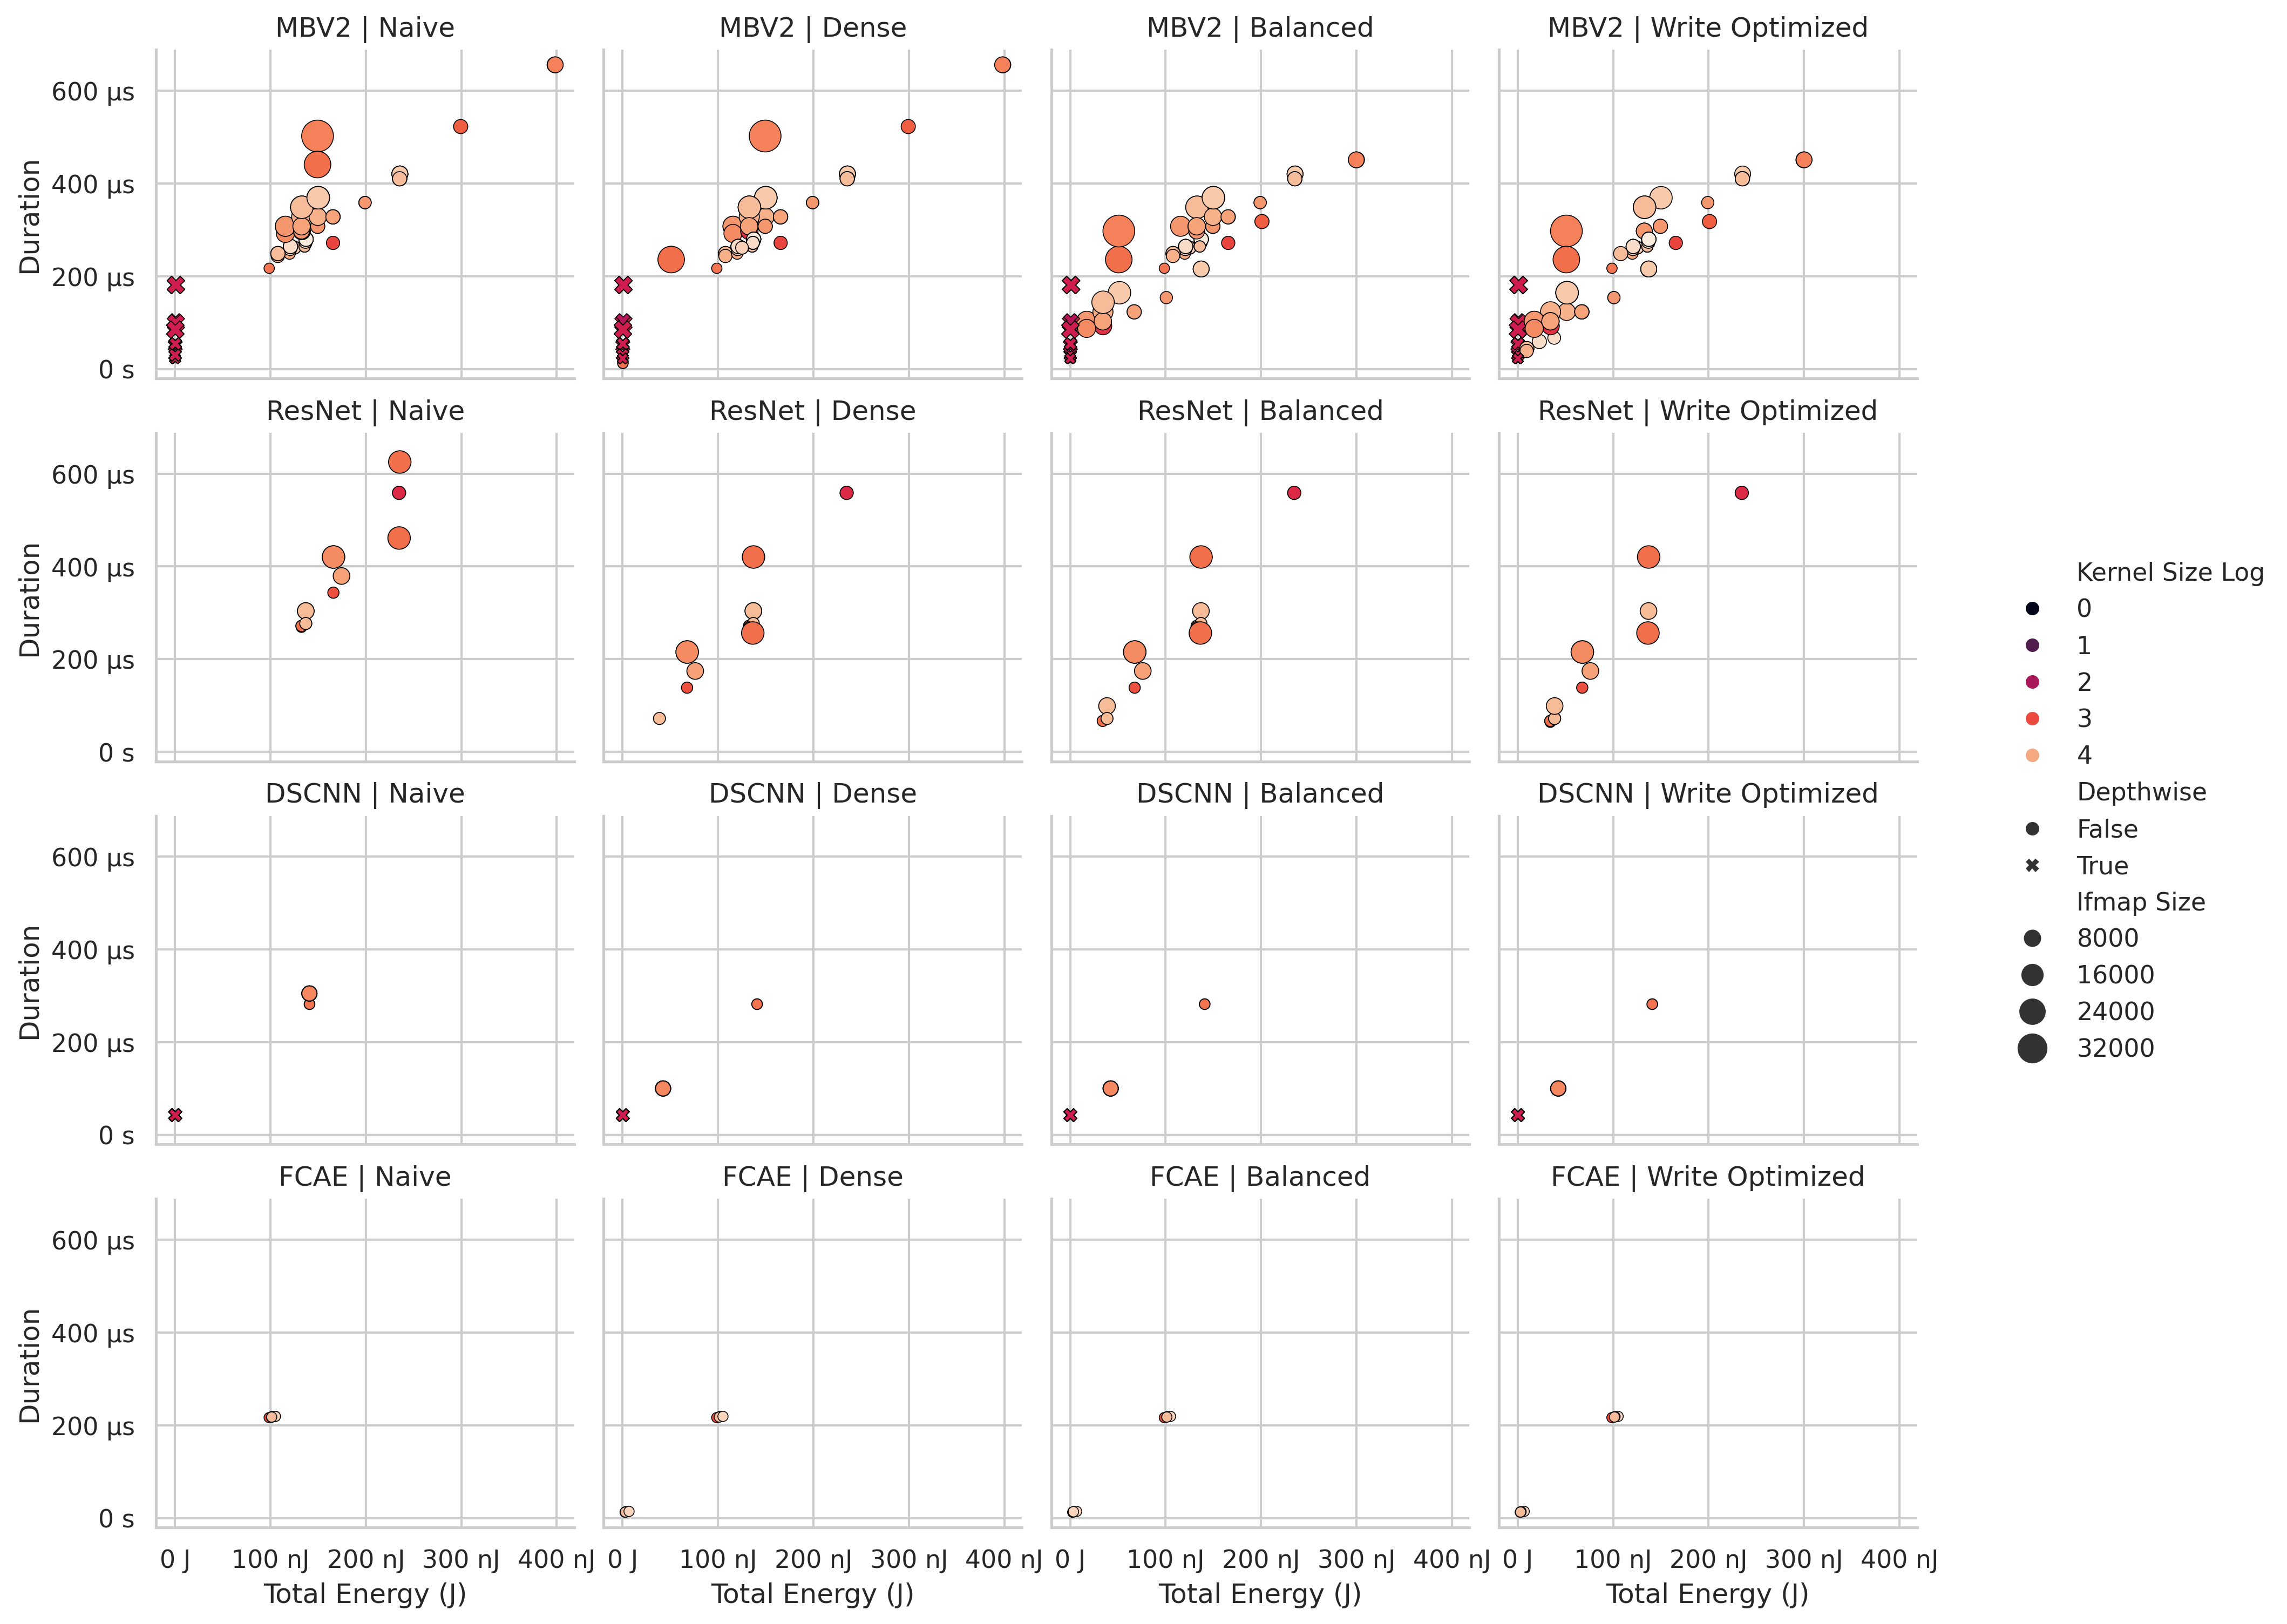

In [85]:
# Duration vs Ifmap size vs Layer type Scatter
mbv2_stat_df = pd.read_csv('mbv2_qracc_statistics_with_ops_and_energy.csv')
# mbv2_stat_df = mbv2_stat_df[mbv2_stat_df['Model'] == 'ResNet']

sns.set_theme(style="whitegrid")
# fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
# Use relplot to facet by PackerType

packer_order = ['Naive','Dense', 'Balanced', 'Write Optimized']
mbv2_stat_df['Packertype'] = pd.Categorical(mbv2_stat_df['Packertype'], categories=packer_order, ordered=True)
mbv2_stat_df = mbv2_stat_df.sort_values('Packertype')

# Get kernel size logarithmically spaced for better visibility
mbv2_stat_df['Kernel Size Log'] = mbv2_stat_df['Kernel Size'].apply(lambda x: np.log10(x) if x > 0 else 0)

g = sns.relplot(
	data=mbv2_stat_df,
	x='Total Energy',
	y='Duration',
	hue='Kernel Size Log',
	style='Depthwise',
	kind='scatter',
	col='Packertype',
    row='Model',
	facet_kws={'sharey': True, 'sharex': True},
	edgecolor='black',
	height=3,
	aspect=1,
    palette='rocket',
    size='Ifmap Size',
    sizes=(20, 200)  # Adjust size range for better visibility
)

# Set DPI to 300
g.fig.set_dpi(300)
g.fig.set_size_inches(14, 10)

# Add lines between points based on index for each facet
# for ax, (_, subdf) in zip(g.axes.flat, mbv2_stat_df.groupby('PackerType')):
# 	ax.plot(subdf['ifmap_size'], subdf['Duration'], color='gray', alpha=0.25, zorder=0)

# set engformatter
from matplotlib.ticker import EngFormatter
for ax in g.axes.flat:
    eng_format_y = EngFormatter(unit='s')
    eng_format_x = EngFormatter(unit='J')
    ax.yaxis.set_major_formatter(eng_format_y)
    ax.xaxis.set_major_formatter(eng_format_x)
    # Add linebreaks to x-axis label
    ax.set_xlabel('Total Energy (J)')
# set legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1.8, 1), borderaxespad=0., frameon=False)
# plt.xscale('log')
# replace node_id with Node Number

# Remove "PackerType" from the facet titles
for ax in g.axes.flat:
    ax.set_title(ax.get_title().replace('Packertype = ', ''))
    ax.set_title(ax.get_title().replace('Model = ', ''))

plt.savefig('qracc_energy_vs_duration_scatter.svg', bbox_inches='tight')

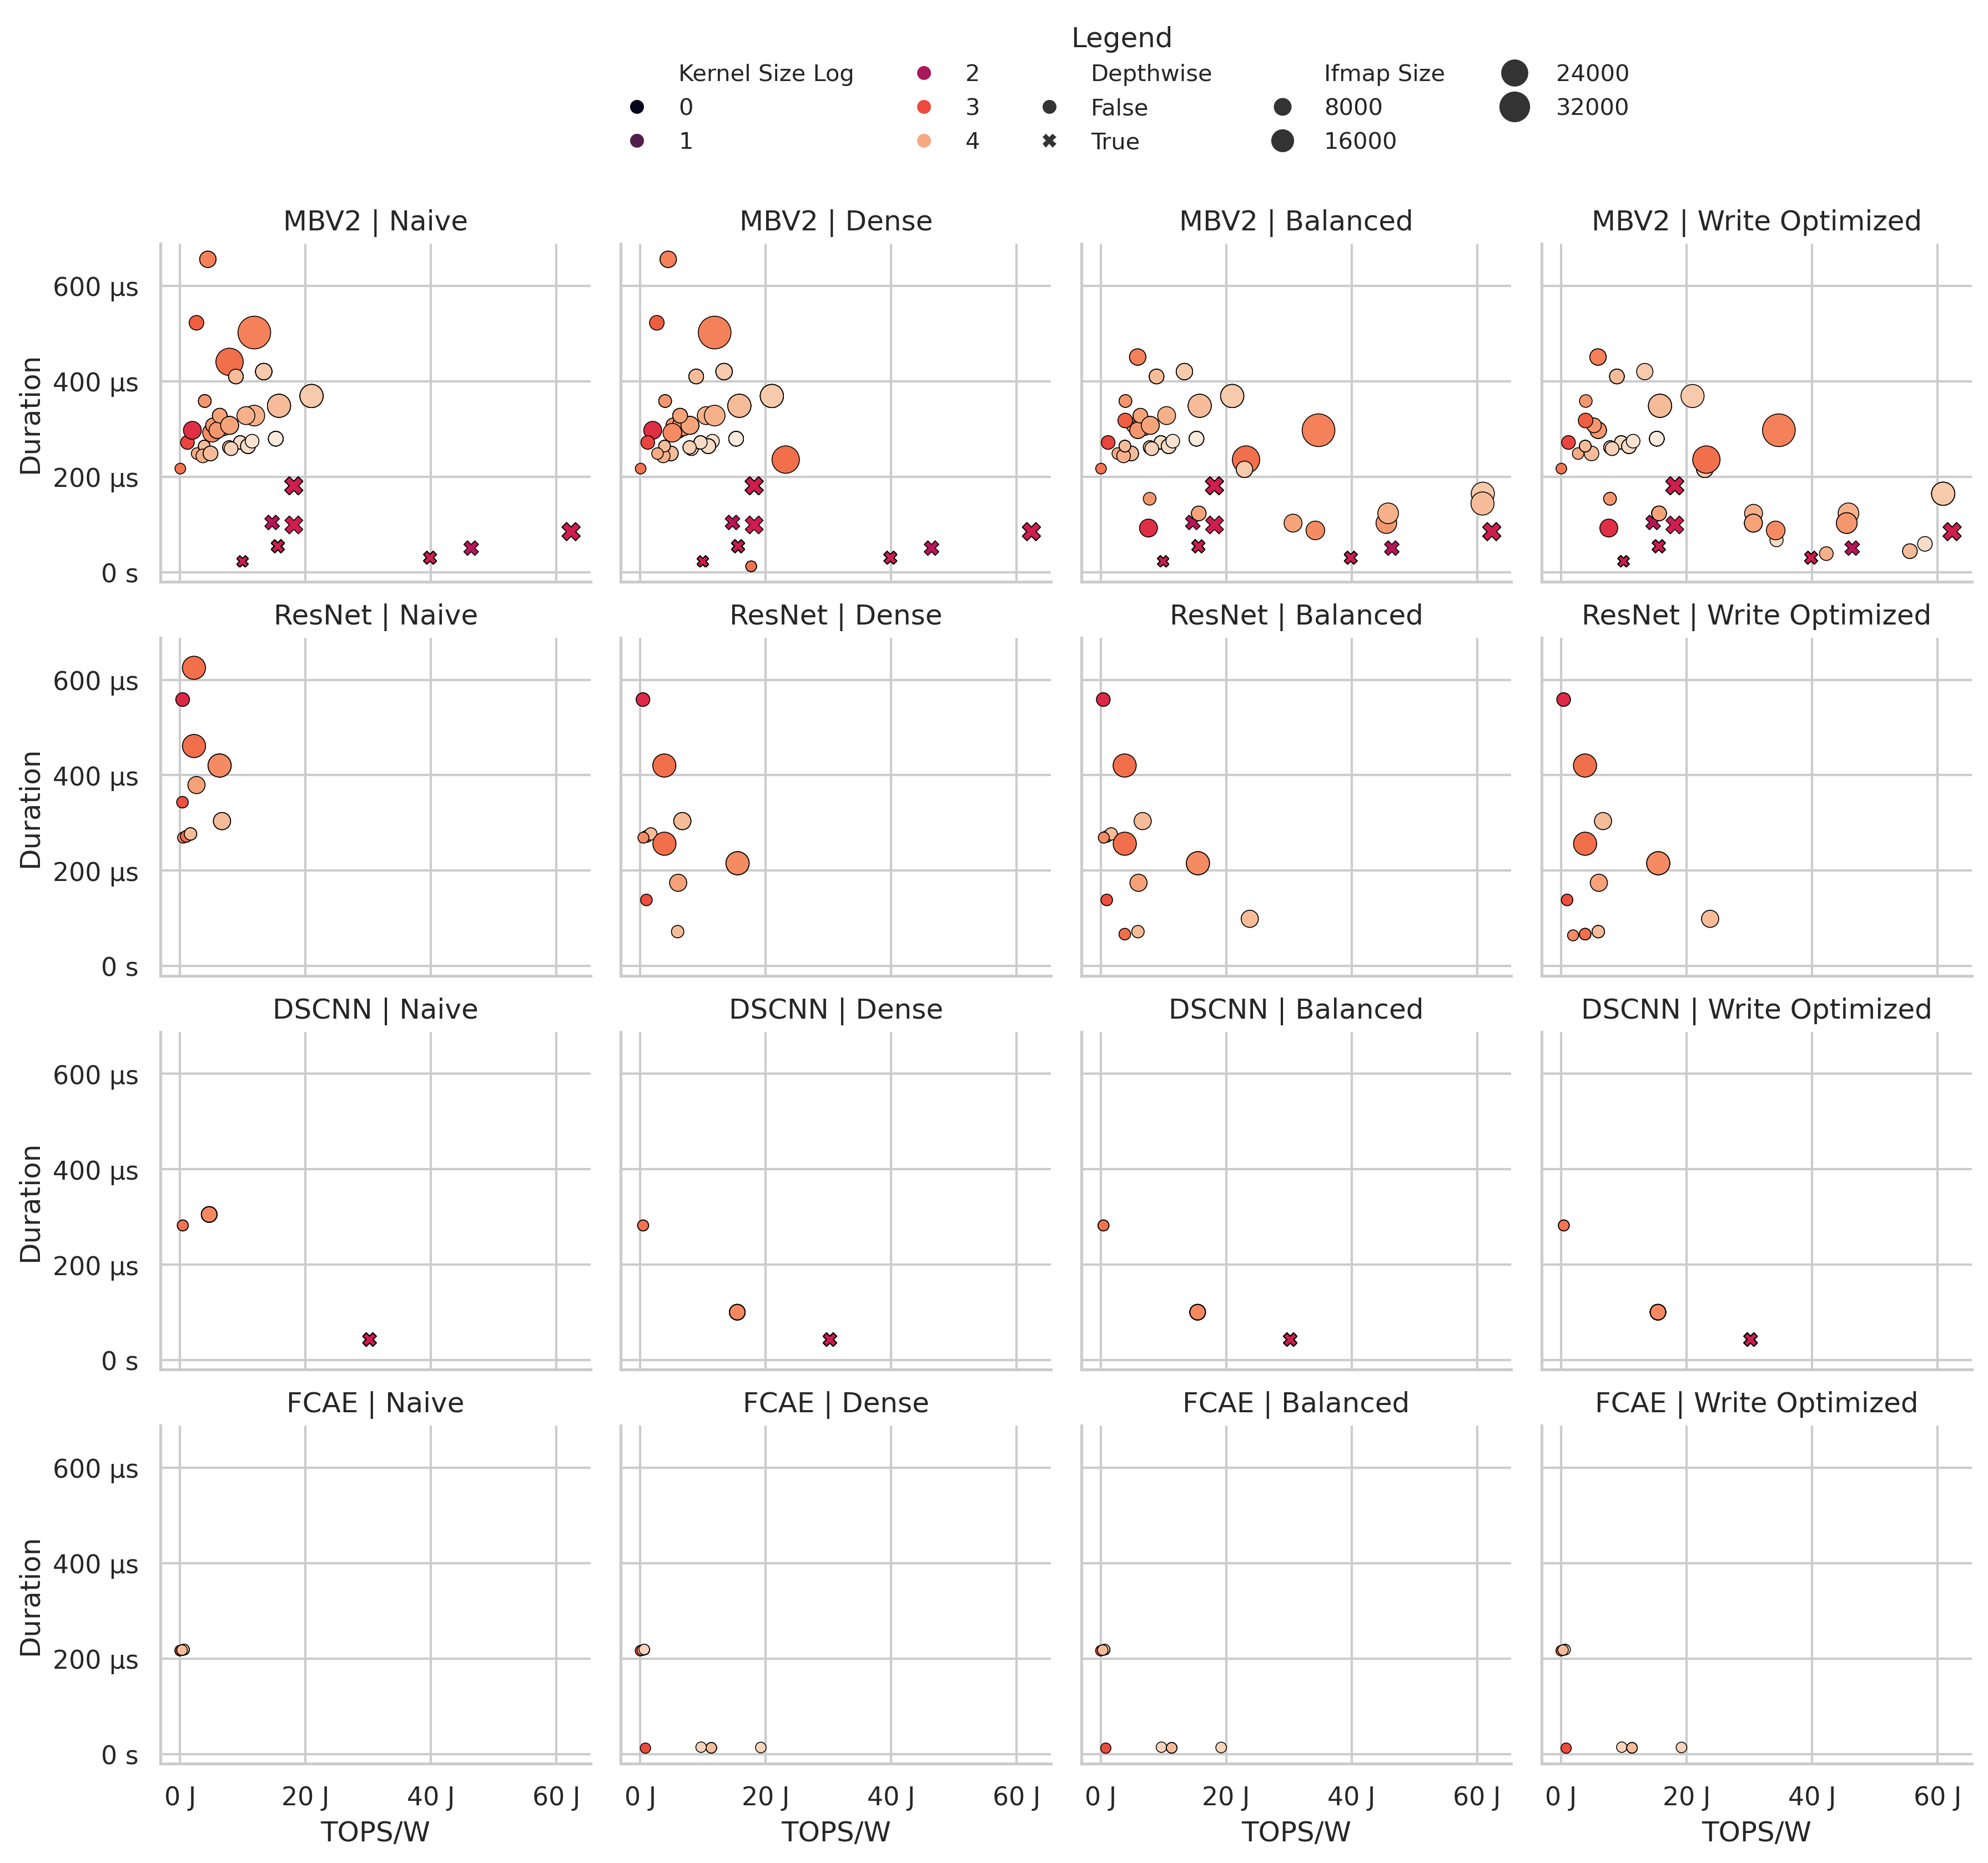

In [86]:
# Duration vs Ifmap size vs Layer type Scatter
mbv2_stat_df = pd.read_csv('mbv2_qracc_statistics_with_ops_and_energy.csv')

sns.set_theme(style="whitegrid")

packer_order = ['Naive','Dense', 'Balanced', 'Write Optimized']
mbv2_stat_df['Packertype'] = pd.Categorical(mbv2_stat_df['Packertype'], categories=packer_order, ordered=True)
mbv2_stat_df = mbv2_stat_df.sort_values('Packertype')

mbv2_stat_df['Kernel Size Log'] = mbv2_stat_df['Kernel Size'].apply(lambda x: np.log10(x) if x > 0 else 0)

g = sns.relplot(
    data=mbv2_stat_df,
    x='TOPS/W',
    y='Duration',
    hue='Kernel Size Log',
    style='Depthwise',
    kind='scatter',
    col='Packertype',
    row='Model',
    facet_kws={'sharey': True, 'sharex': True},
    edgecolor='black',
    height=3,
    aspect=1,
    palette='rocket',
    size='Ifmap Size',
    sizes=(20, 200),
)

# Remove the default legend
g._legend.remove()

# Set DPI and figure size
g.fig.set_dpi(300)
g.fig.set_size_inches(14, 10)

# Add custom legend below the plot
g.fig.legend(
    loc='lower center', 
    bbox_to_anchor=(0.5, 1.01), 
    ncol=5, 
    title='Legend',
    frameon=False,
    fontsize='small'
)

from matplotlib.ticker import EngFormatter
for ax in g.axes.flat:
    eng_format_y = EngFormatter(unit='s')
    eng_format_x = EngFormatter(unit='J')
    ax.yaxis.set_major_formatter(eng_format_y)
    ax.xaxis.set_major_formatter(eng_format_x)

for ax in g.axes.flat:
    ax.set_title(ax.get_title().replace('Packertype = ', ''))
    ax.set_title(ax.get_title().replace('Model = ', ''))

plt.savefig('qracc_tops_per_w_vs_duration_scatter.svg', bbox_inches='tight')


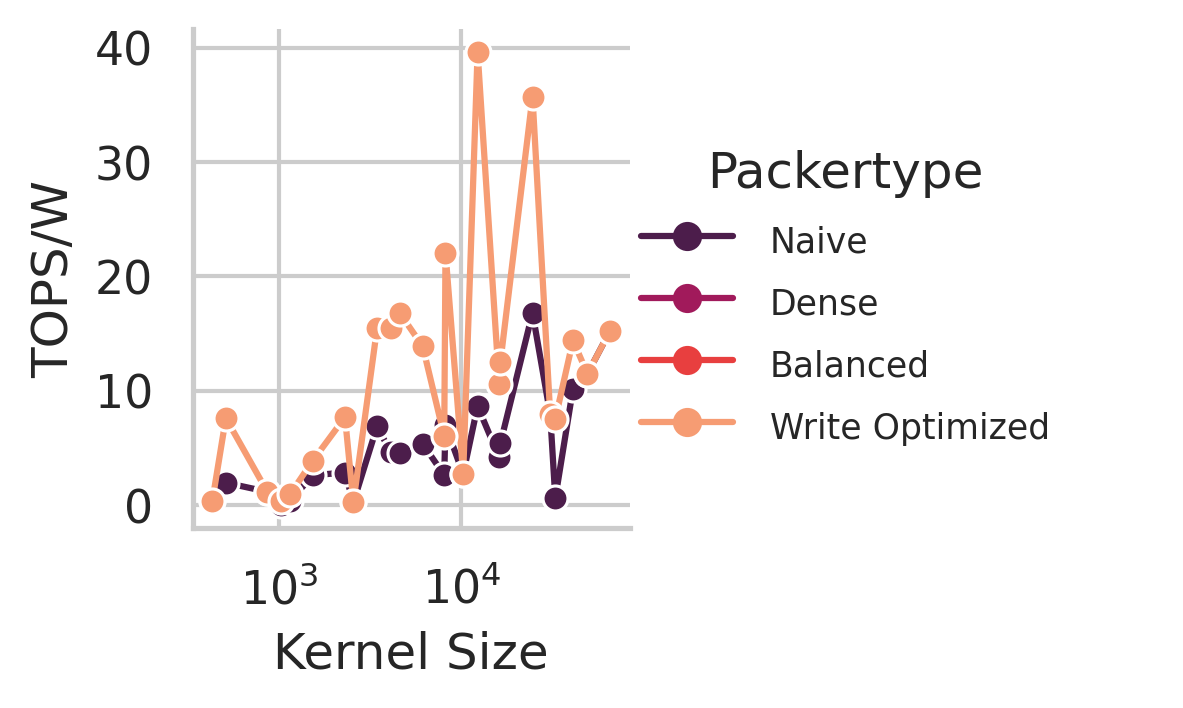

In [217]:
mbv2_stat_df = pd.read_csv('mbv2_qracc_statistics_with_ops_and_energy.csv')
mbv2_stat_df = mbv2_stat_df[mbv2_stat_df['Depthwise'] == False]  # Filter out depthwise layers

# Histplot of kernel size vs TOPS/W
sns.set_theme(style="whitegrid")
packer_order = ['Naive','Dense', 'Balanced', 'Write Optimized']
mbv2_stat_df['Packertype'] = pd.Categorical(mbv2_stat_df['Packertype'], categories=packer_order, ordered=True)
mbv2_stat_df = mbv2_stat_df.sort_values('Packertype')   

g = sns.relplot(
    data=mbv2_stat_df[mbv2_stat_df['Packertype'].isin(['Naive','Write Optimized'])],
    x='Kernel Size',
    y='TOPS/W',
    hue='Packertype',
    kind='line',
    palette='rocket',
    errorbar=None,
    marker='o',
    legend=True  # Enable legend so it is created
)

g.fig.set_dpi(300)
g.fig.set_size_inches(2.5, 2)

# Set engformatter
from matplotlib.ticker import EngFormatter
for ax in g.axes.flat:
    eng_format_x = EngFormatter(unit='B')
    ax.xaxis.set_major_formatter(eng_format_x)
    ax.set_xlabel('Kernel Size')
    ax.set_ylabel('TOPS/W')
    ax.set_title(ax.get_title().replace('Packertype = ', ''))
    # Move the legend outside the plot
    g._legend.set_bbox_to_anchor((0.8, 1))
    g._legend.set_title('Packertype')
    g._legend._loc = 2  # upper left
    g._legend.set_frame_on(False)
    for text in g._legend.get_texts():
        text.set_fontsize('x-small')

# Set logx
plt.xscale('log')


In [233]:
mbv2_stat_df[mbv2_stat_df['Packertype'].isin(['Write Optimized','Naive'])][['Node Number','Model','Packertype','TOPS/W']].sort_values(by=['Model','Packertype','Node Number'], ascending=True)

Node Number   Model       Packertype    TOPS/W
1364          1.0   DSCNN            Naive  0.444990
1367          7.0   DSCNN            Naive  4.654000
1370         13.0   DSCNN            Naive  4.654000
1373         19.0   DSCNN            Naive  4.654000
1376         25.0   DSCNN            Naive  4.654000
...           ...     ...              ...       ...
1345         19.0  ResNet  Write Optimized  6.696534
1346         20.0  ResNet  Write Optimized  3.840613
1347         26.0  ResNet  Write Optimized  5.942374
1348         27.0  ResNet  Write Optimized  5.942374
1349         28.0  ResNet  Write Optimized  1.920307

[238 rows x 4 columns]

In [240]:
diff_df[['Node Number','Model','Packertype','TOPS/W WRopt','TOPS/W Naive','TOPS/W Diff']].sort_values(by=['Model','Packertype','Node Number'], ascending=True)

Node Number   Model       Packertype  TOPS/W WRopt  TOPS/W Naive  \
1390          1.0   DSCNN  Write Optimized      0.444990      4.654000   
1393          7.0   DSCNN  Write Optimized     15.454850      0.051874   
1396         13.0   DSCNN  Write Optimized     15.454850      3.861146   
1399         19.0   DSCNN  Write Optimized     15.454850     15.270535   
1402         25.0   DSCNN  Write Optimized     15.454850      3.861146   
...           ...     ...              ...           ...           ...   
1345         19.0  ResNet  Write Optimized      6.696534      3.861146   
1346         20.0  ResNet  Write Optimized      3.840613     15.270535   
1347         26.0  ResNet  Write Optimized      5.942374      3.861146   
1348         27.0  ResNet  Write Optimized      5.942374      9.598167   
1349         28.0  ResNet  Write Optimized      1.920307     15.270535   

      TOPS/W Diff  
1390    -4.209009  
1393    15.402976  
1396    11.593703  
1399     0.184315  
1402    11.593703  
...           ...  
1345     2.835388  
1346   -11.429922  
1347     2.081228  
1348    -3.655793  
1349   -13.350228  

[119 rows x 6 columns]

<>:37: SyntaxWarning: invalid escape sequence '\D'
<>:37: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_971930/2414460386.py:37: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel('Avg. $\Delta$ TOPS/W')


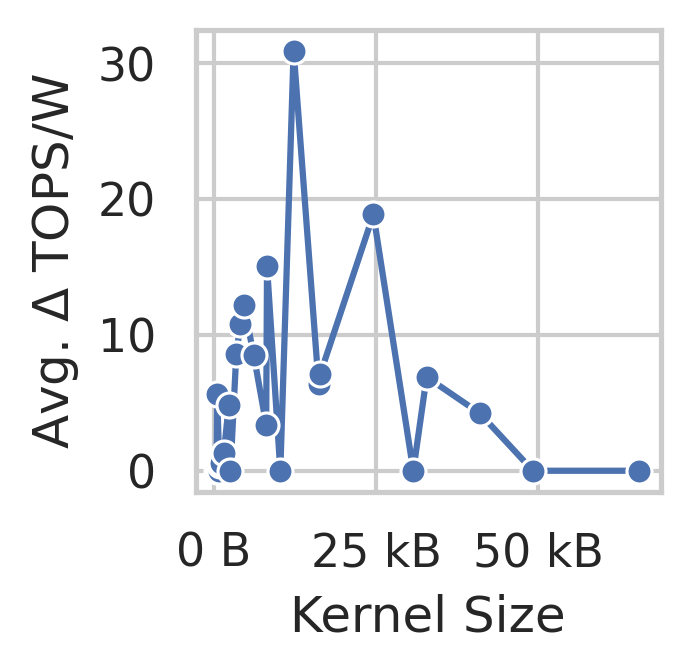

In [243]:
mbv2_stat_df = pd.read_csv('mbv2_qracc_statistics_with_ops_and_energy.csv')
mbv2_stat_df = mbv2_stat_df[mbv2_stat_df['Depthwise'] == False]  # Filter out depthwise layers

# Histplot of kernel size vs TOPS/W
sns.set_theme(style="whitegrid")
packer_order = ['Naive','Dense', 'Balanced', 'Write Optimized']
mbv2_stat_df['Packertype'] = pd.Categorical(mbv2_stat_df['Packertype'], categories=packer_order, ordered=True)
mbv2_stat_df = mbv2_stat_df.sort_values('Packertype')   

# Get difference of Write Optimized TOPS/W and Naive TOPS/W
wropt_df = mbv2_stat_df[mbv2_stat_df['Packertype'] == 'Write Optimized'].sort_values(by=['Model','Packertype','Node Number'], ascending=True)
naive_df = mbv2_stat_df[mbv2_stat_df['Packertype'] == 'Naive'].sort_values(by=['Model','Packertype','Node Number'], ascending=True)

diff_df = wropt_df.copy()
diff_df['TOPS/W WRopt'] = wropt_df['TOPS/W'].values
diff_df['TOPS/W Naive'] = naive_df['TOPS/W'].values
diff_df['TOPS/W Diff'] = diff_df['TOPS/W WRopt'] - diff_df['TOPS/W Naive']

fig,ax = plt.subplots(figsize=(2, 2), dpi=300)

sns.lineplot(
    data=diff_df,
    x='Kernel Size',
    y='TOPS/W Diff',
    # kind='line',
    # palette='rocket',
    errorbar=None,
    marker='o',
    ax=ax
)

# Set engformatter
from matplotlib.ticker import EngFormatter
eng_format_x = EngFormatter(unit='B')
ax.xaxis.set_major_formatter(eng_format_x)
ax.set_xlabel('Kernel Size')
ax.set_ylabel('Avg. $\Delta$ TOPS/W')

plt.savefig('qracc_wropt_vs_naive_tops_per_w.svg', bbox_inches='tight')

# Some additional analysis of the overall TOPS and Power used in each inference

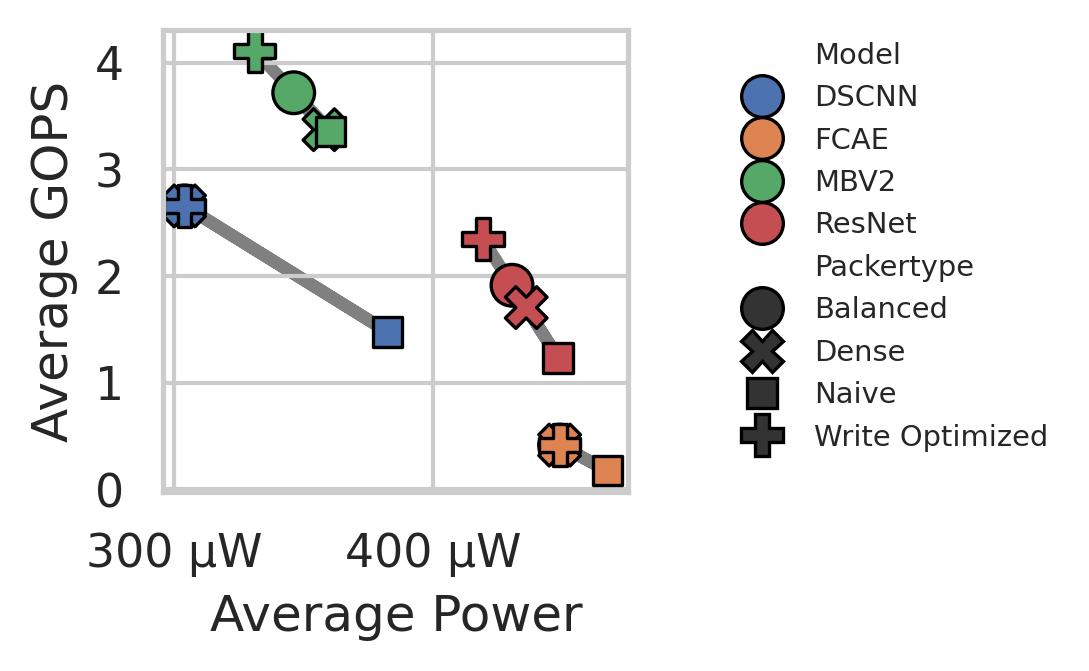

In [214]:
mbv2_stat_df = pd.read_csv('mbv2_qracc_statistics_with_ops_and_energy.csv')
mbv2_stat_df

# Sum the OPS for successive Node Numbers for each PackerType and Model
mbv2_stat_df['Cumulative OPS'] = mbv2_stat_df.groupby(['Packertype', 'Model'])['OPS'].cumsum()
mbv2_stat_df['Cumulative Energy'] = mbv2_stat_df.groupby(['Packertype', 'Model'])['Total Energy'].cumsum()
mbv2_stat_df['Average Power'] = mbv2_stat_df['Cumulative Energy'] / mbv2_stat_df['Time']
mbv2_stat_df['Average GOPS'] = mbv2_stat_df['Cumulative OPS'] / mbv2_stat_df['Time'] / 1e9  # Convert to TOPS

# # Keep only the final Node Number for each PackerType and Model
df_last = mbv2_stat_df.groupby(['Packertype', 'Model']).last().reset_index()
df_last

fig, ax = plt.subplots(figsize=(2,2), dpi=300)

sns.scatterplot(data=df_last, 
    y='Average GOPS', 
    x='Average Power', 
    style='Packertype', 
    hue='Model', 
    # size='Cumulative Energy',
    s=100,
    edgecolor='black'
)

# Write gray lines betwen points of the same Model
for model in df_last['Model'].unique():
    model_df = df_last[df_last['Model'] == model]
    ax.plot(model_df['Average Power'], model_df['Average GOPS'], color='gray', alpha=1, linewidth=3, zorder=0)

# Set legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1), borderaxespad=0., frameon=False, fontsize='xx-small')

# Set engformatter for axes
from matplotlib.ticker import EngFormatter
eng_format_x = EngFormatter(unit='W')
# eng_format_y = EngFormatter(unit='TOPS')
ax.xaxis.set_major_formatter(eng_format_x)

plt.savefig('qracc_gops_vs_power.svg', bbox_inches='tight')